# Rampa in T del GaSb

Per la prima temperatura  $T_1=78.68$  K si raccoglie lo spettro a 6 diverse intensità [0e5, 1, 2e5, 5, 10, 25]

In [505]:
arr_filtro = ['0e5', '1', '2e5', '5', '10', '25'] # + 'pc'

Per ciascuna delle successive 20 temperature, si raccoglie lo spettro con filtro 0e5.

In [506]:
arr_T = ['78e68', '90', '100', '110', '120', '130', '140', '150', '160', '170', '180',
      '190', '200', '210', '220', '230', '240', '250', '260', '280', '300'] # + 'K'

## Importazioni

In [507]:
from qp2_subroutines import *
import os

In [508]:
os.getcwd() 

'/Users/zosojack/lab-ss/QP2'

## Preliminari

Per la costruzione dei nomi dei file

In [509]:
def build_name_GaSb (T: str = None, filtro: str = None):
    # t_acq == 0e1
    # n_acq == 4
    # grating == 35lmm
    # ecc=None
    fen='fen1e1'
    
    if T is None:
        T = '78e68'
    if filtro is None:
        filtro = '0e5'
    
    cartella = 'data/rampa_T_GaSb/'
    name = 'Giak_' + '0e1_4_35lmm_' + T + 'K_' + filtro + 'pc_' + fen + '.asc'
    
    return cartella+name

Per il fit: opto per la somma di N gaussiane.

Il vettore params viene definito come una list di N triple (a, mu, sigma), una per ciascuna gaussiana. Successivamente deve essere 'appiattito' con .flatten() per renderlo un array unidimensionale, trattabile da curve_fit().

In [510]:
def N_gaussiane (x, *params):
    # Inizializzo il risultato
    y = np.zeros_like(x)
    # Sommo una gaussiana per ciascuna entrata della list
    for i in range(0, len(params), 3):  # Scandisco i parametri a gruppi di 3
        A, mu, sigma = params[i], params[i+1], params[i+2]
        y += gaussiana(x, A, mu, sigma)
        
    return y

Servirà dopo per i colori nei grafici.

In [511]:
col = ['red', 'green', 'magenta', 'purple', 'peru', 'cyan', 
       'olive', 'goldenrod', 'black', 'sienna', 'steelblue', 'crimson']

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Analisi

In una prima fase abbiamo anche verificato che 0e1 fosse il tempo di acquisizione ottimale, si potrebbe inserire nell'analisi.

## GaSb: T=79K su INTENSITÀ

#### Contenitore per i dati

In [512]:
# dictionary GaSb
# le keys saranno i filtri
# ciascuna key conterrà le due colonne del file:
# GaSb[filtro][0] - colonna 0 del file (lunghezze d'onda)
# GaSb[filtro][1] - colonna 1 del file (counts)

GaSb_flt = {}

#### Lettura file

In [513]:
for filtro in arr_filtro:
    
    # Costruisco nome file
    name = build_name_GaSb (filtro=filtro)
    # Estraggo i dati 
    waveln, counts = leggi_file_asc (name)
    # Pulisco i counts da valori insensati
    counts = clean_counts (counts)
    # Raccolgo
    GaSb_flt[filtro] = (waveln, counts)

#### Plot su intensità + FIT somma Gaussiane

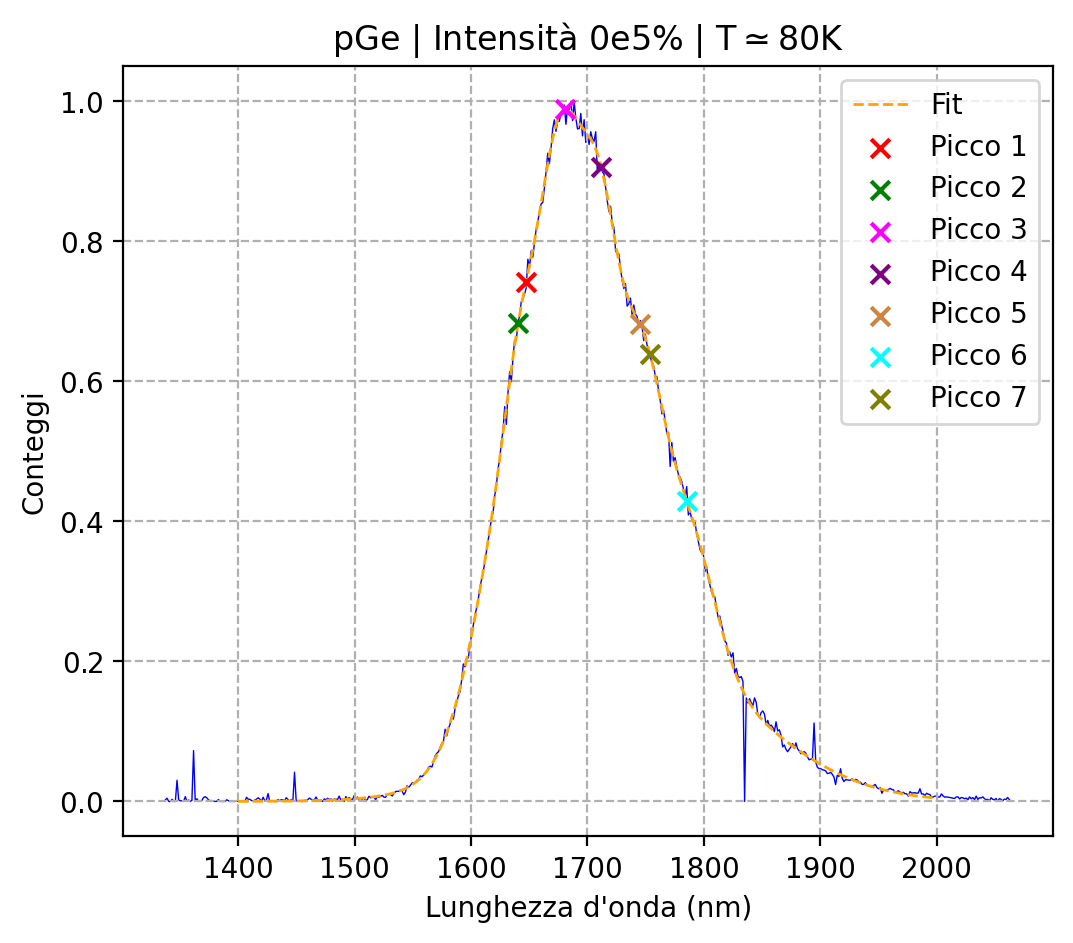

• Gaussiana  1
 - A = 0.47774405052575614
 - mu = 1647.3641846633561
 - sigma = 34.518288988986676
• Gaussiana  2
 - A = 0.07077920770646474
 - mu = 1640.6691181345823
 - sigma = 11.491230176751323
• Gaussiana  3
 - A = 0.4864790060635867
 - mu = 1680.6354545348229
 - sigma = 19.030660787801793
• Gaussiana  4
 - A = 0.4366434031177693
 - mu = 1711.9240990715998
 - sigma = 15.557172316391256
• Gaussiana  5
 - A = 0.38195715031244043
 - mu = 1744.9968767477787
 - sigma = 18.656343694520213
• Gaussiana  6
 - A = 0.20420688046112
 - mu = 1785.2698412615212
 - sigma = 23.14052305354599
• Gaussiana  7
 - A = 0.1998840599732297
 - mu = 1753.645346057066
 - sigma = 90.02300073378527


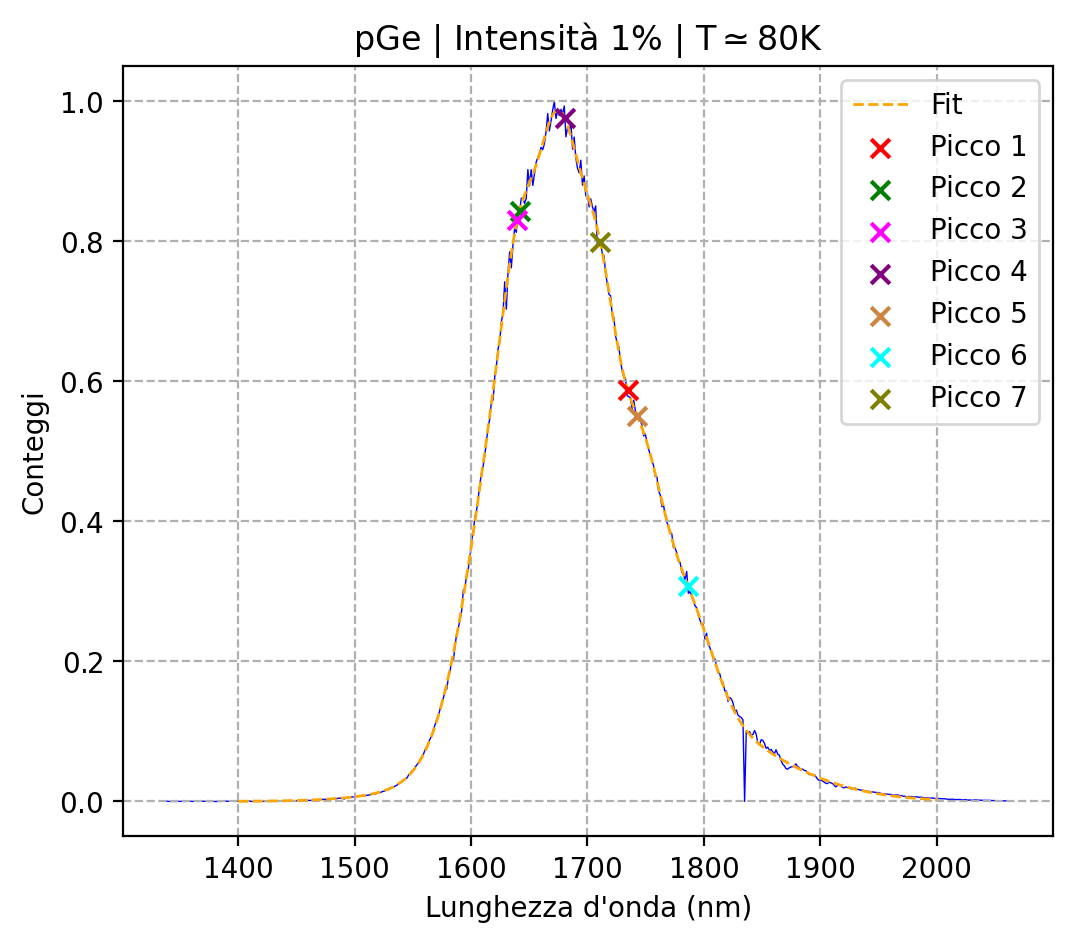

• Gaussiana  1
 - A = 0.16821649021537433
 - mu = 1734.639112905894
 - sigma = 91.8534039872538
• Gaussiana  2
 - A = 0.6094626741669849
 - mu = 1641.8002104260968
 - sigma = 35.42115730400222
• Gaussiana  3
 - A = 0.07362461501858435
 - mu = 1639.8251397462159
 - sigma = 11.096503253908404
• Gaussiana  4
 - A = 0.46032706079233315
 - mu = 1680.5517292521968
 - sigma = 19.289629327132495
• Gaussiana  5
 - A = 0.3211089899431068
 - mu = 1742.886341748232
 - sigma = 20.303410056396498
• Gaussiana  6
 - A = 0.1318171105040235
 - mu = 1786.2656936973908
 - sigma = 22.287982939774825
• Gaussiana  7
 - A = 0.31988306890860124
 - mu = 1710.9474284910739
 - sigma = 14.606293524419904


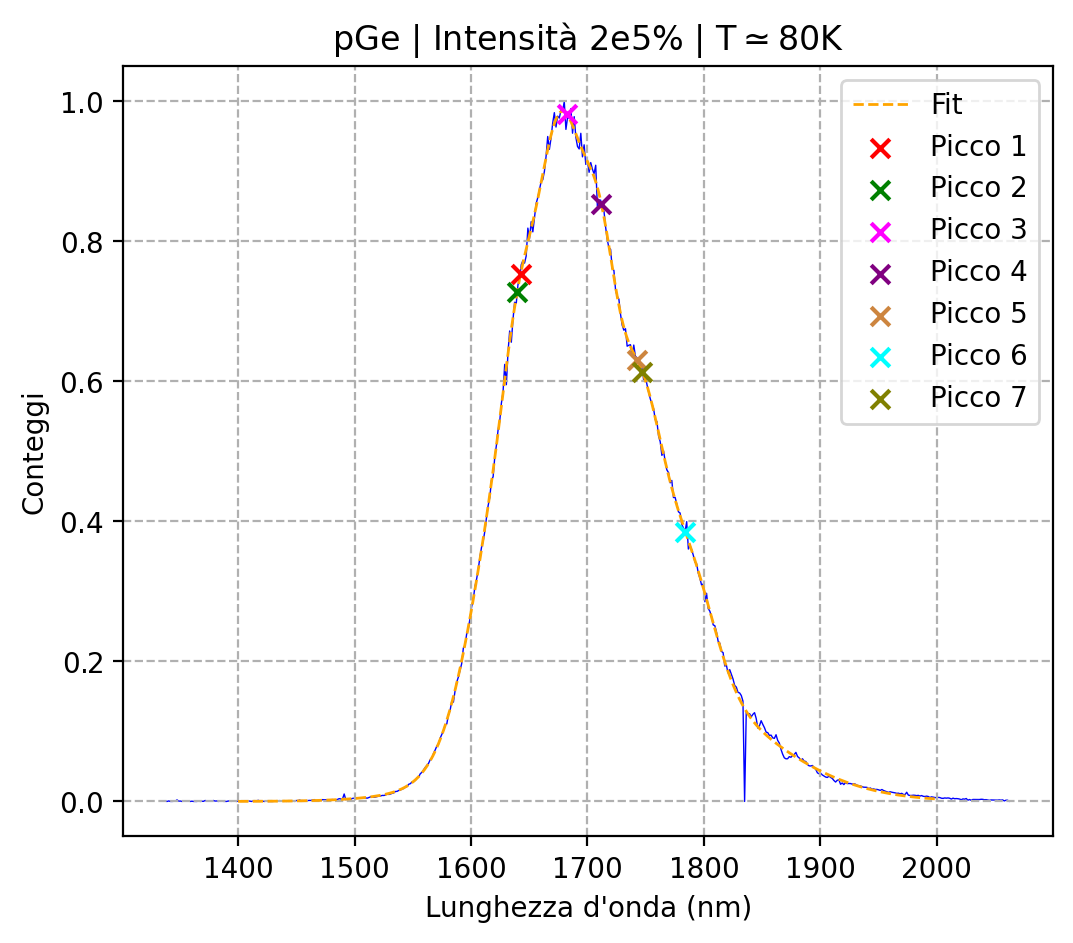

• Gaussiana  1
 - A = 0.4915103185175551
 - mu = 1642.5312539134743
 - sigma = 33.6418755716789
• Gaussiana  2
 - A = 0.0746217513567163
 - mu = 1639.6433120850795
 - sigma = 11.417602682182654
• Gaussiana  3
 - A = 0.556755943611529
 - mu = 1682.065822015844
 - sigma = 20.990951203447803
• Gaussiana  4
 - A = 0.31308880726730315
 - mu = 1711.9693770429387
 - sigma = 14.00135923223749
• Gaussiana  5
 - A = 0.363668428955918
 - mu = 1742.6078709857454
 - sigma = 19.439412714705387
• Gaussiana  6
 - A = 0.1757042306615826
 - mu = 1784.1628469081306
 - sigma = 23.402219414984792
• Gaussiana  7
 - A = 0.18790840417996746
 - mu = 1747.1528841512466
 - sigma = 89.43785939620304


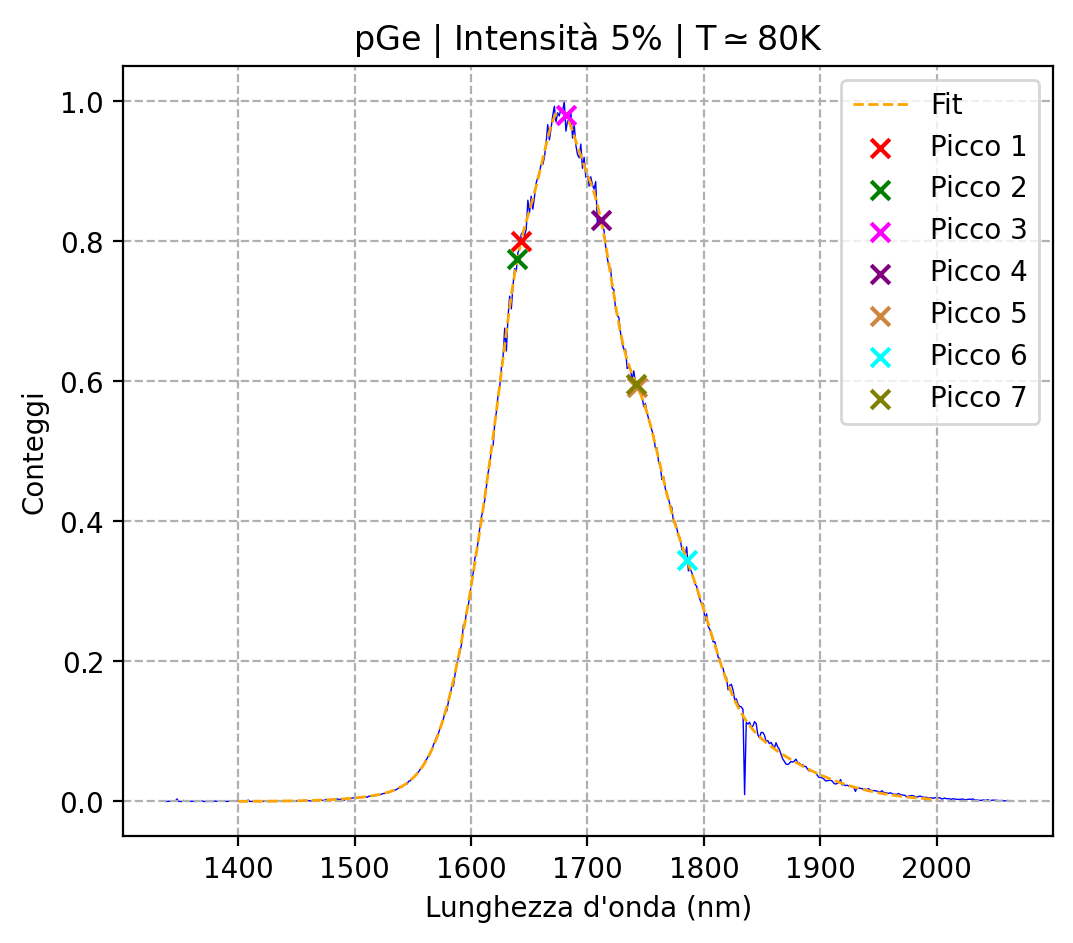

• Gaussiana  1
 - A = 0.5537787892566892
 - mu = 1643.122248011578
 - sigma = 34.577983210353395
• Gaussiana  2
 - A = 0.07250982834594323
 - mu = 1639.776720374116
 - sigma = 11.226422224188306
• Gaussiana  3
 - A = 0.4995664350196807
 - mu = 1681.4035587536798
 - sigma = 20.064627790724096
• Gaussiana  4
 - A = 0.3240055857043062
 - mu = 1711.6333147938826
 - sigma = 14.492506326136342
• Gaussiana  5
 - A = 0.3439810007888962
 - mu = 1742.985423632591
 - sigma = 19.94073782576368
• Gaussiana  6
 - A = 0.15189525527004985
 - mu = 1785.4562274050563
 - sigma = 22.898495091180845
• Gaussiana  7
 - A = 0.17713019278018774
 - mu = 1741.863357274513
 - sigma = 90.13881898003521


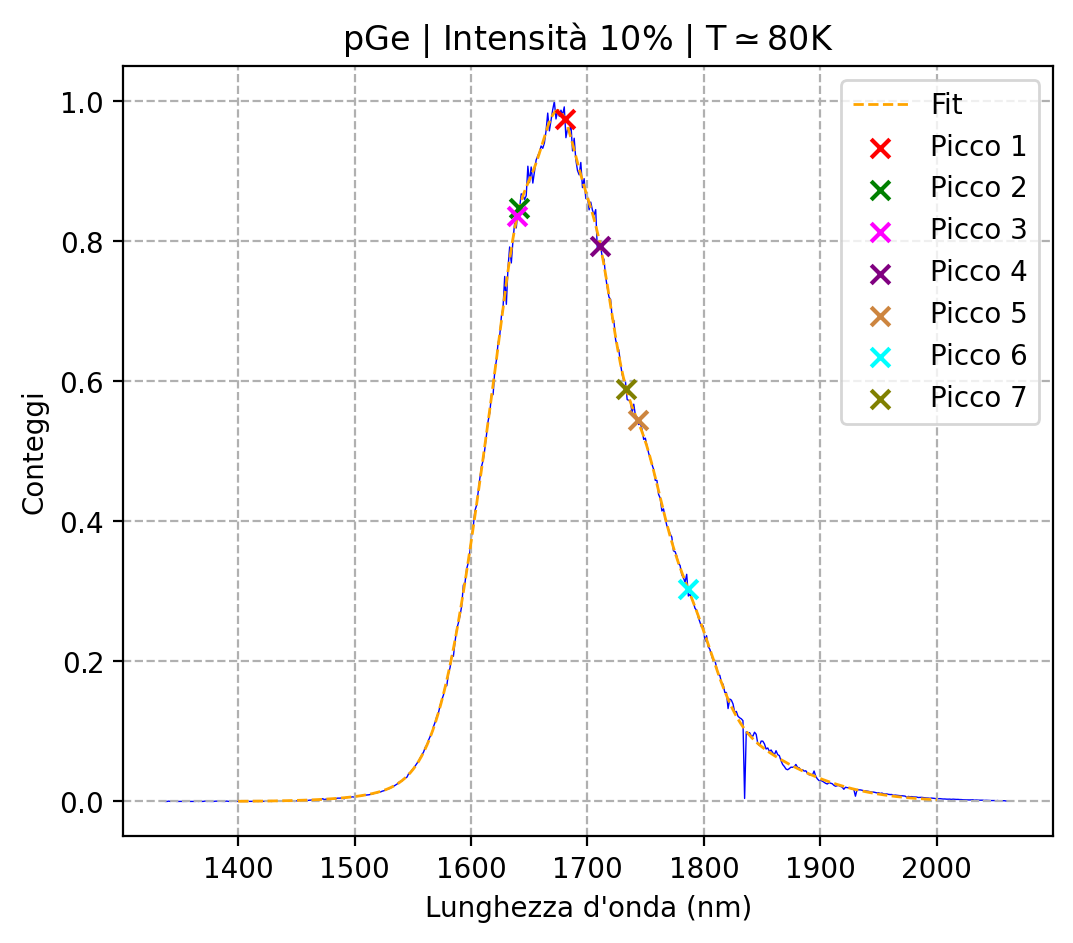

• Gaussiana  1
 - A = 0.457918813926931
 - mu = 1680.7489853865663
 - sigma = 19.377391674714207
• Gaussiana  2
 - A = 0.6146616856938021
 - mu = 1641.5478771679398
 - sigma = 35.51489627044596
• Gaussiana  3
 - A = 0.07245952240783786
 - mu = 1639.8747186109408
 - sigma = 10.990098206756972
• Gaussiana  4
 - A = 0.3132427391337997
 - mu = 1711.1587457616329
 - sigma = 14.559685511479794
• Gaussiana  5
 - A = 0.31610894226529485
 - mu = 1743.0831931348825
 - sigma = 20.24412673236474
• Gaussiana  6
 - A = 0.12807636092744795
 - mu = 1786.4820666621893
 - sigma = 21.985377430011265
• Gaussiana  7
 - A = 0.16973189451032178
 - mu = 1733.3709838799575
 - sigma = 91.8216605036342


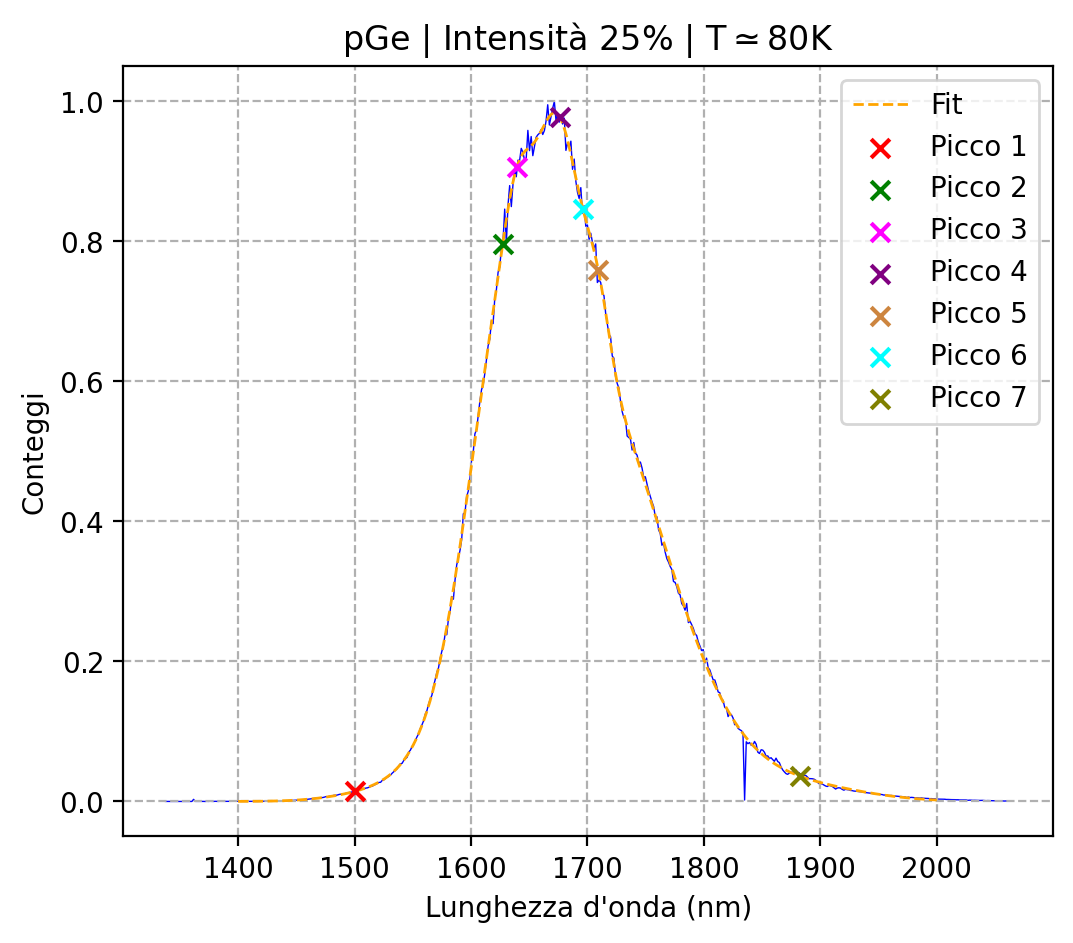

• Gaussiana  1
 - A = 0.003647528296537072
 - mu = 1500.0000000007562
 - sigma = 29.673586961339776
• Gaussiana  2
 - A = 0.364903226761478
 - mu = 1627.2101454049023
 - sigma = 30.275540459868907
• Gaussiana  3
 - A = 0.08700389038029205
 - mu = 1639.2871572267338
 - sigma = 11.170929102549135
• Gaussiana  4
 - A = 0.2899046525921462
 - mu = 1676.0506932446049
 - sigma = 19.103072897730456
• Gaussiana  5
 - A = 0.08469254890791994
 - mu = 1709.3442280310605
 - sigma = 10.579399898234861
• Gaussiana  6
 - A = 0.6131433467671881
 - mu = 1696.0361823958235
 - sigma = 68.77996983522405
• Gaussiana  7
 - A = 0.020584902904962902
 - mu = 1882.3148861578431
 - sigma = 54.749469576981845


In [514]:
for filtro in arr_filtro:
    
    waveln = GaSb_flt[filtro][0]
    counts = GaSb_flt[filtro][1]
    
    # normalizzo i counts
    maximum = np.max(counts)
    counts = counts / maximum

    # Plot
    plt.figure(figsize=(6,5), dpi=200)
    plt.plot(waveln, counts, linestyle='-', color='b', linewidth=0.5, zorder=1)
    
    ## FIT ##
    
    # isolo regione 1400 < x < 2000
    mask = (waveln > 1400) & (waveln < 2000)
    x_fit = waveln[mask]
    y_fit = counts[mask]
    
    # impostazione parametri: ogni entrata è una tripla (a, mu, sigma)
    params = [
        (1, 1600, 50),
        (1, 1700, 50),
        (1, 1720, 50),
        (1, 1735, 50),
        (1, 1750, 50),
        (1, 1780, 50),
        (1, 1800, 50)
    ]
    # 'Appiattisco' la lista dei parametri iniziali
    par_flattened = np.array(params).flatten()
    
    # Set dei bounds
    low = [0, 1500, 10] * len(params)  # Es: A >= 0, mu >= 1500, sigma >= 10
    upp = [np.inf, 1900, 200] * len(params)  # Limiti superiori
    
    # esecuzione fit
    try:
        # Fit gaussiano - che bounds impostare?
        popt, pcov = curve_fit(N_gaussiane, x_fit, y_fit, p0=par_flattened, bounds=(low,upp))
    except:
        print(f"Fit non riuscito")
        
    ## PLOT CURVA FIT ##
    x_fit = np.linspace(1400, 2000, 500)
    y_fit = N_gaussiane(x_fit, *popt)
    plt.plot(x_fit, y_fit, linestyle='--', color='orange', label=f"Fit", linewidth=1, zorder=2)
    
    # plotto anche i picchi individuati dal fit
    for i in range(0, round(len(popt)/3)): 
        x_picco = popt[3*i+1]
        y_picco = N_gaussiane(x_picco, *popt)
        plt.scatter(x_picco, y_picco, 
                    color=col[i], 
                    marker='x',
                    label='Picco '+str(i+1),
                    s=45,
                    zorder=3
                    )
    
    ## OPZIONI GRAFICHE ##
    plt.title(r'pGe | Intensità ' + filtro + '% | T$\simeq80$K')
    plt.xlabel("Lunghezza d'onda (nm)")
    plt.ylabel("Conteggi")
    plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
    plt.legend()
    plt.grid(linestyle='--')
    #plt.tight_layout()
    plt.show()
    
    ## PRINT RISULTATI FIT ##
    for i in range(0, round(len(popt)/3)):
        print('• Gaussiana ', i+1)
        print(' - A =', popt[3*i])
        print(' - mu =', popt[3*i+1])
        print(' - sigma =', popt[3*i+2])

### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - -

## GaSb: filtro=0e5pc su TEMPERATURA

#### Contenitore per i dati

In [515]:
# dictionary GaSb
# le keys saranno i filtri
# ciascuna key conterrà le due colonne del file:
# GaSb[filtro][0] - colonna 0 del file (lunghezze d'onda)
# GaSb[filtro][1] - colonna 1 del file (counts)

GaSb_T = {}

#### Lettura file

In [516]:
for T in arr_T:
    
    # Costruisco nome file
    name = build_name_GaSb (T=T)
    # Estraggo i dati 
    waveln, counts = leggi_file_asc (name)
    # Pulisco i counts da valori insensati
    counts = clean_counts (counts)
    # Raccolgo
    GaSb_T[T] = (waveln, counts)

#### Plot su temperatura

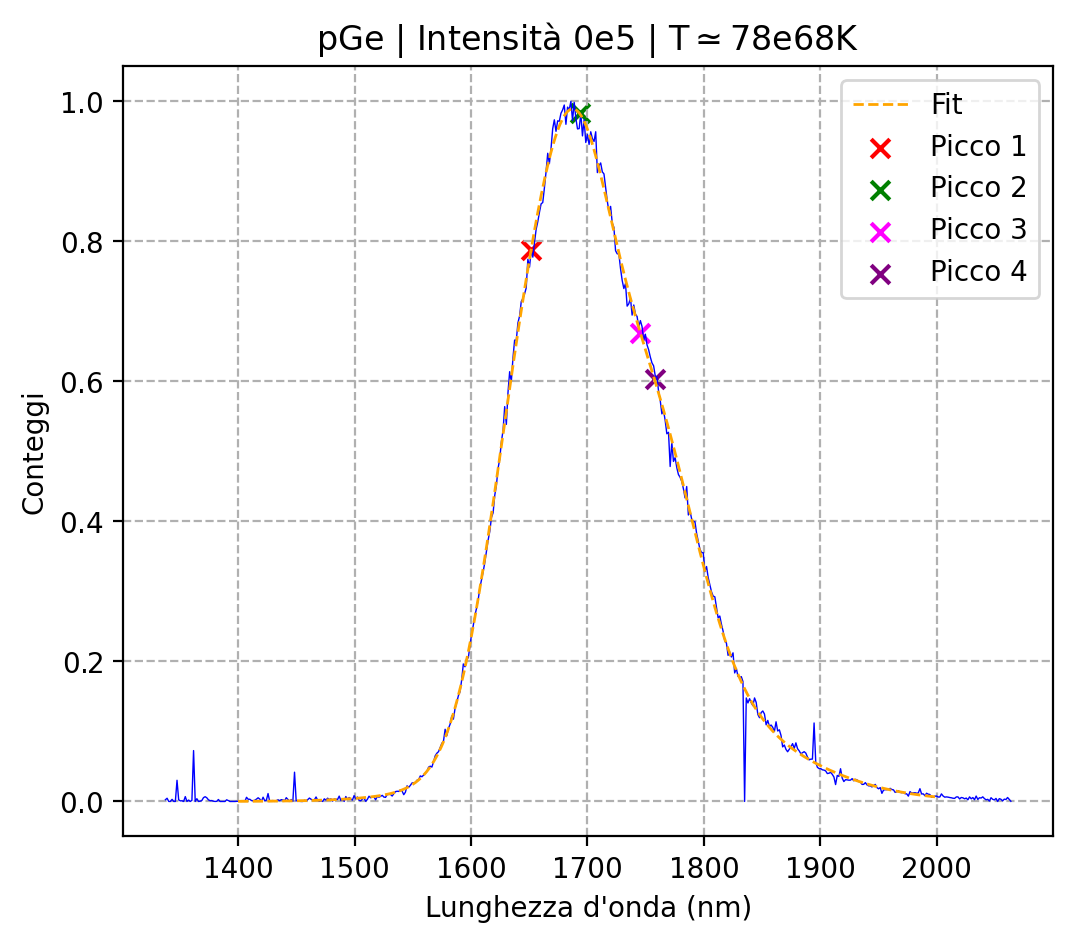

• Gaussiana  1
 - A = 0.5353814988252696
 - mu = 1651.5504950284917
 - sigma = 35.84361553169365
• Gaussiana  2
 - A = 0.37846830957717625
 - mu = 1693.1932005694832
 - sigma = 28.237975858370966
• Gaussiana  3
 - A = 0.43462515185651884
 - mu = 1745.39343008206
 - sigma = 43.51260021968862
• Gaussiana  4
 - A = 0.15033004202707237
 - mu = 1757.6037177504247
 - sigma = 96.32751652639007


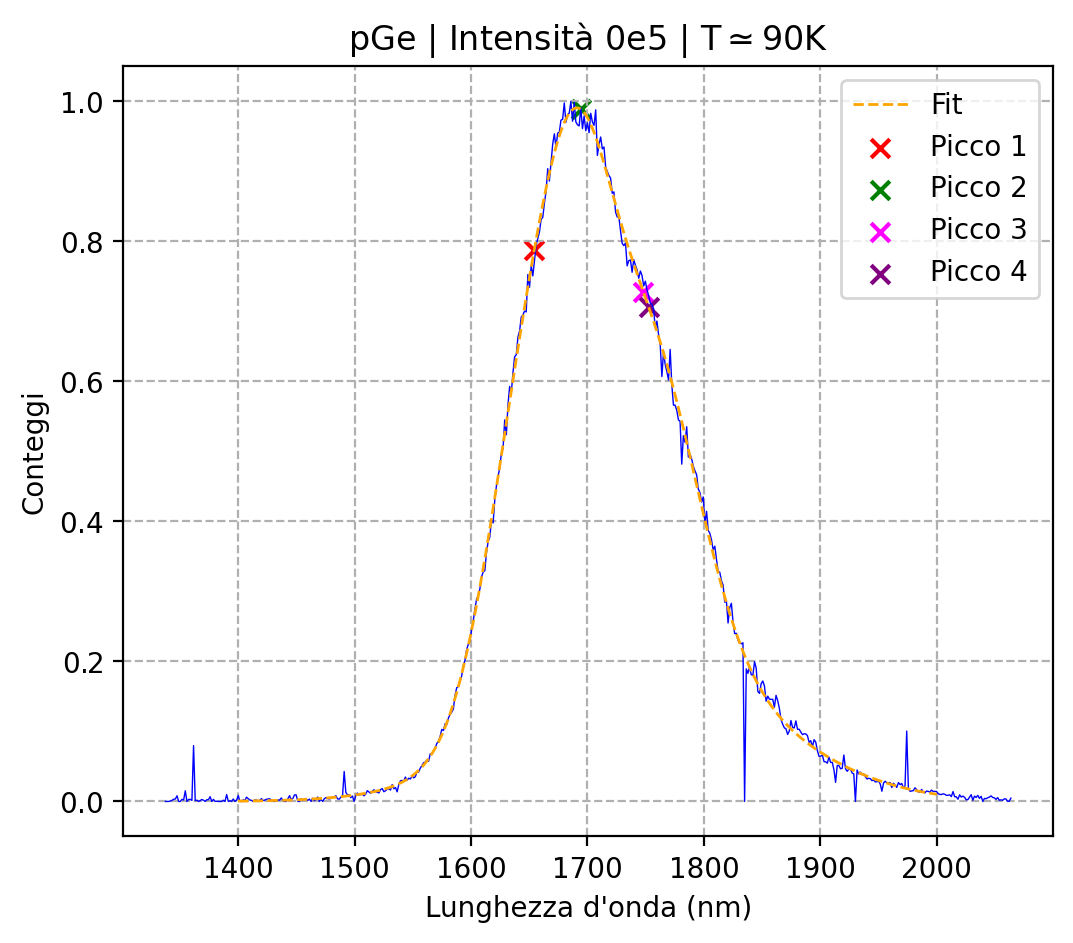

• Gaussiana  1
 - A = 0.5029819998774299
 - mu = 1654.286090933501
 - sigma = 37.18947877941803
• Gaussiana  2
 - A = 0.31894820783684785
 - mu = 1694.2577315489168
 - sigma = 27.617376845361196
• Gaussiana  3
 - A = 0.4606884572986456
 - mu = 1747.9714909016523
 - sigma = 44.04673388600457
• Gaussiana  4
 - A = 0.19879235037114115
 - mu = 1752.4859076414766
 - sigma = 101.59622449154885


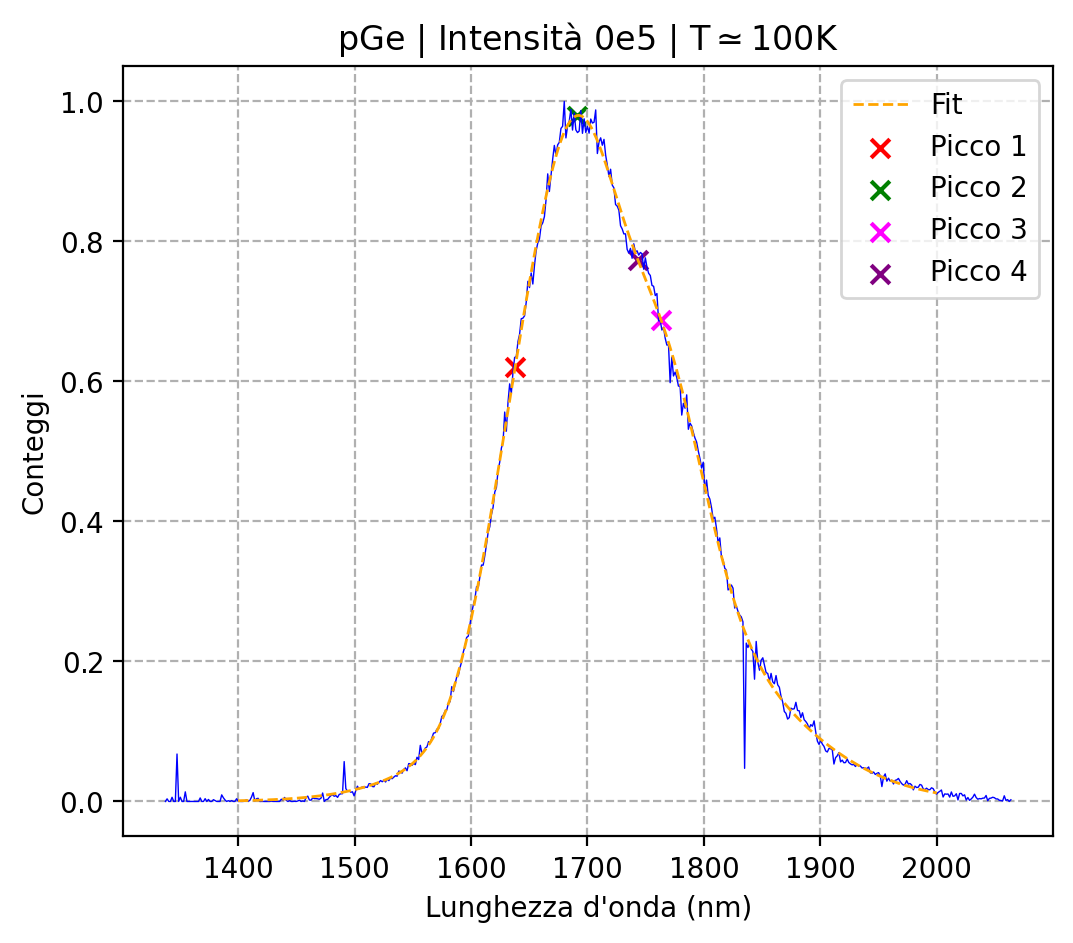

• Gaussiana  1
 - A = 0.26429432364152367
 - mu = 1637.8709815368125
 - sigma = 32.24545375318977
• Gaussiana  2
 - A = 0.6097522877717079
 - mu = 1691.1582755141396
 - sigma = 34.54991479712015
• Gaussiana  3
 - A = 0.33332546197190216
 - mu = 1763.376052491338
 - sigma = 36.612691361853656
• Gaussiana  4
 - A = 0.2906028770329848
 - mu = 1743.2863837579555
 - sigma = 101.86002635761209


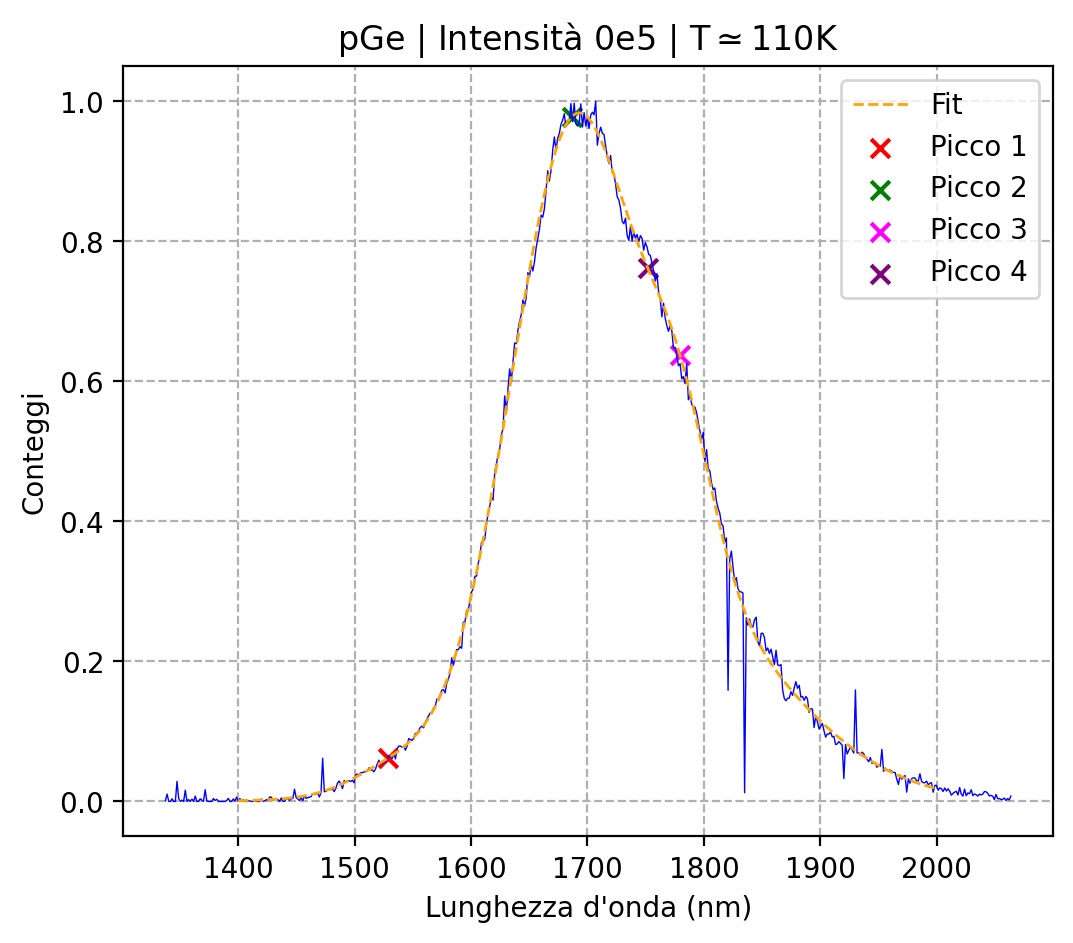

• Gaussiana  1
 - A = 0.022960347194064867
 - mu = 1528.4552541423718
 - sigma = 33.09757364603842
• Gaussiana  2
 - A = 0.7161968772719499
 - mu = 1686.5755698823157
 - sigma = 52.18552814696403
• Gaussiana  3
 - A = 0.1840861937323169
 - mu = 1779.4646204055741
 - sigma = 28.702378230065044
• Gaussiana  4
 - A = 0.3181525227162733
 - mu = 1751.8327560127339
 - sigma = 103.80531572381749


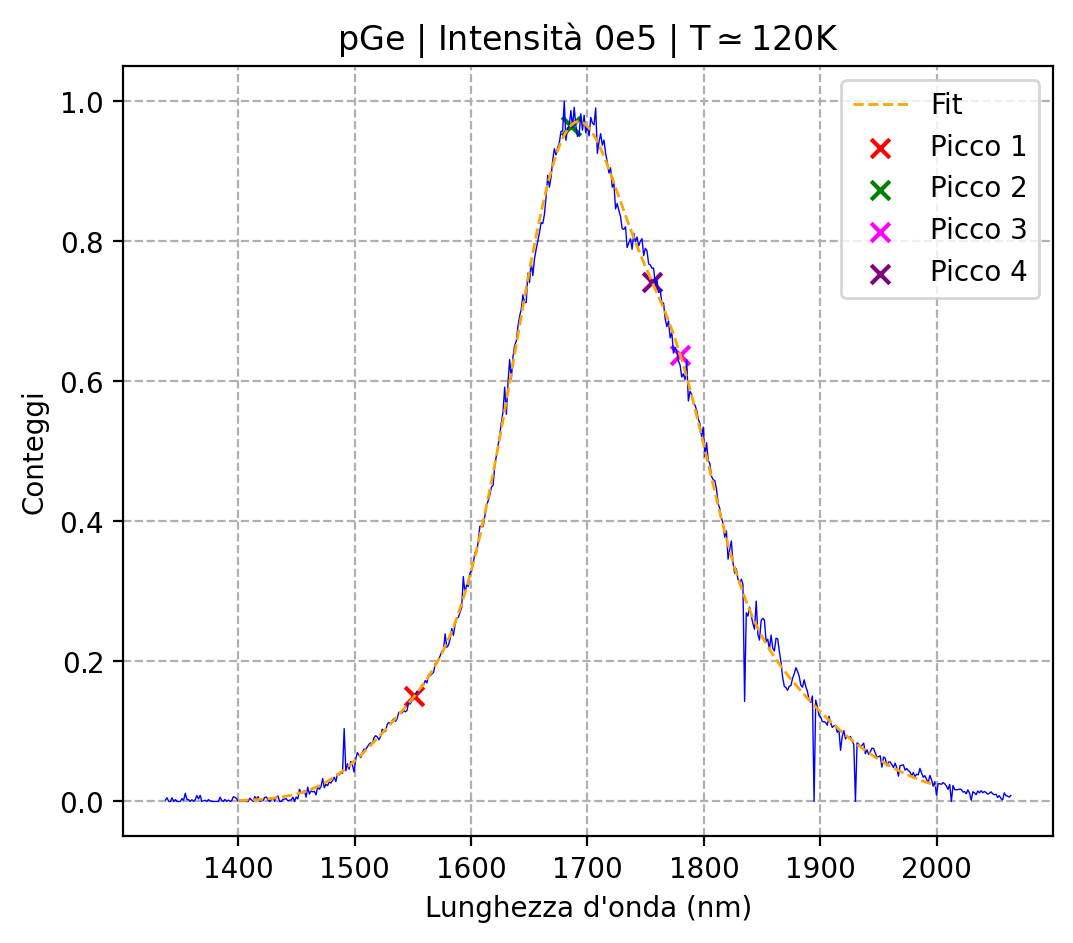

• Gaussiana  1
 - A = 0.07663945670860574
 - mu = 1551.1633869432214
 - sigma = 44.24068235490289
• Gaussiana  2
 - A = 0.7026021495303584
 - mu = 1685.615078107054
 - sigma = 51.52135892117381
• Gaussiana  3
 - A = 0.18919606573707176
 - mu = 1779.6683960944176
 - sigma = 30.421496827011246
• Gaussiana  4
 - A = 0.3244911647089333
 - mu = 1755.7607143982848
 - sigma = 105.79774260815421


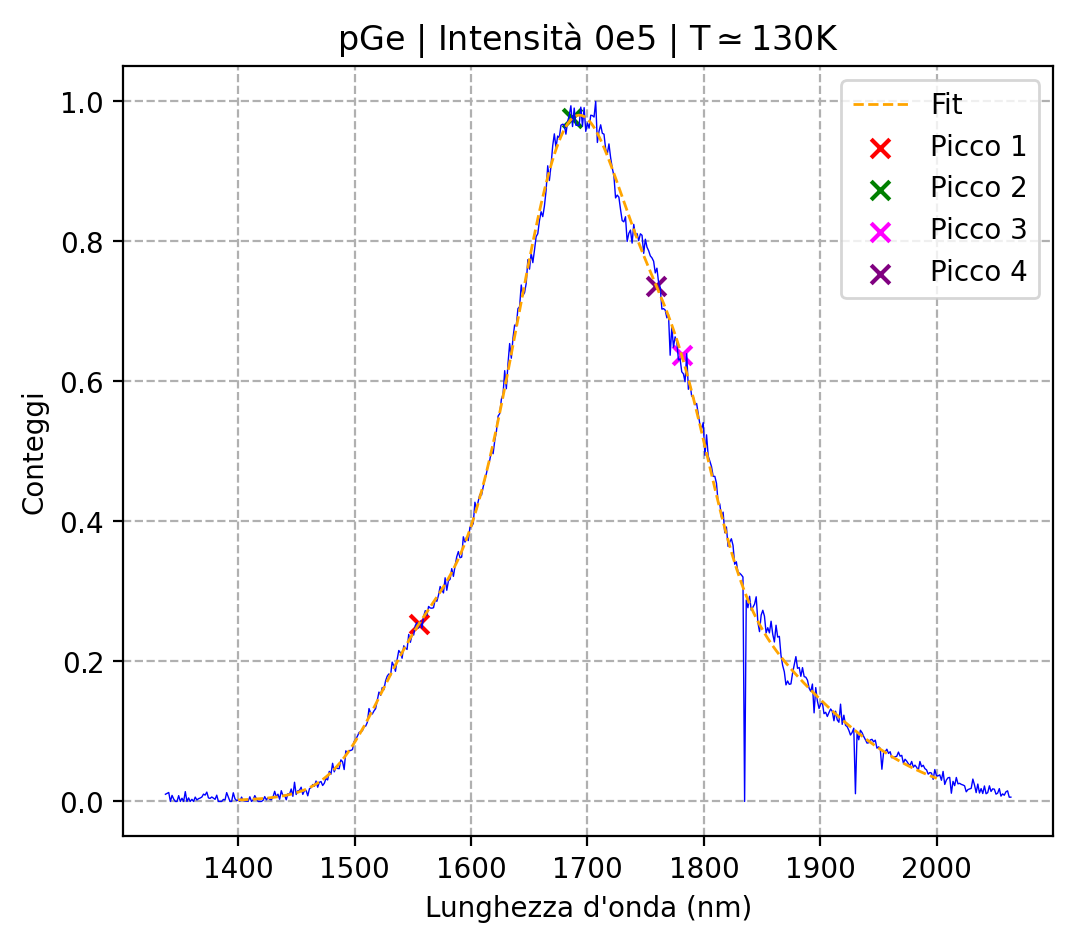

• Gaussiana  1
 - A = 0.15624251852478424
 - mu = 1555.2939088640692
 - sigma = 39.846435821626486
• Gaussiana  2
 - A = 0.7181540442729152
 - mu = 1686.8910936493398
 - sigma = 53.560999523612736
• Gaussiana  3
 - A = 0.1756753046986681
 - mu = 1780.9153229623869
 - sigma = 29.586196835865483
• Gaussiana  4
 - A = 0.3136195936593131
 - mu = 1759.3006145935365
 - sigma = 113.4129975309325


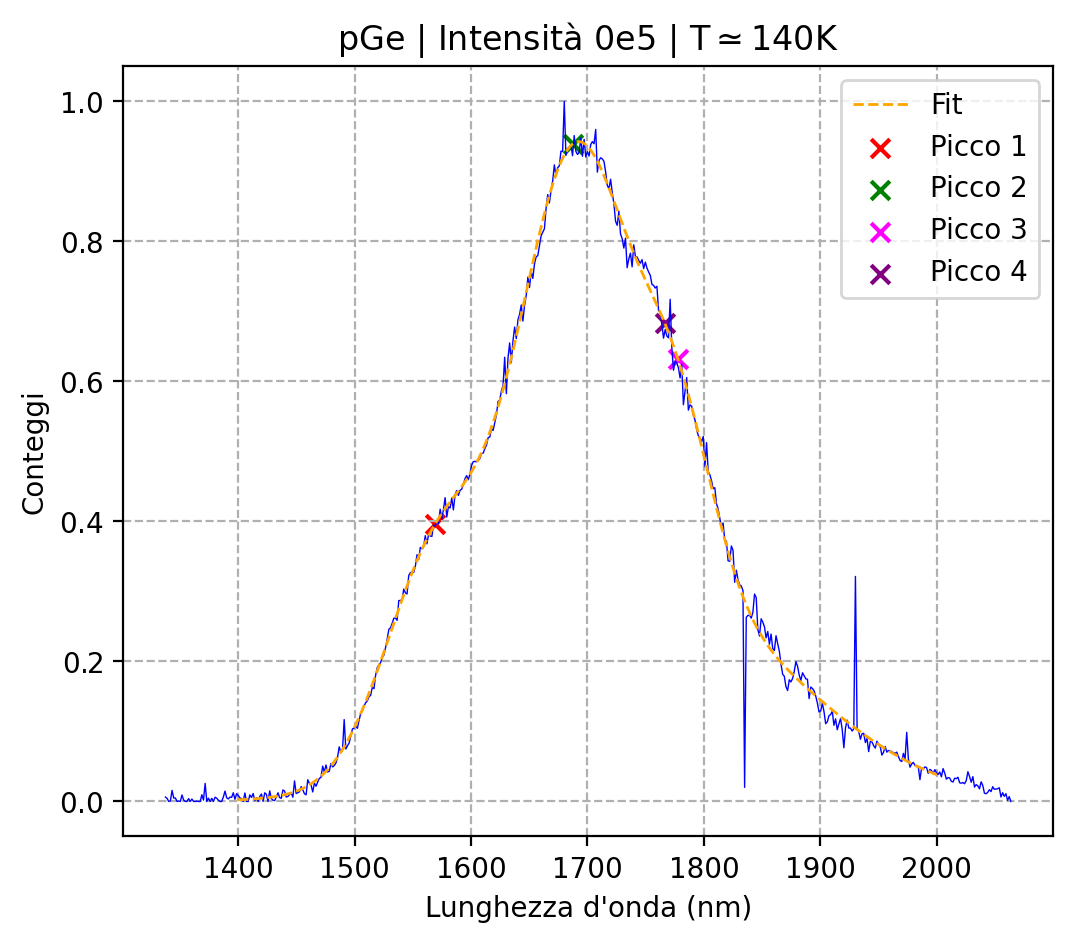

• Gaussiana  1
 - A = 0.291792868137938
 - mu = 1569.1651902703775
 - sigma = 43.935973482854536
• Gaussiana  2
 - A = 0.7059004418622822
 - mu = 1687.735744174161
 - sigma = 48.77193267485258
• Gaussiana  3
 - A = 0.22705404353225564
 - mu = 1777.5484052740892
 - sigma = 32.0244920141958
• Gaussiana  4
 - A = 0.27741133348306896
 - mu = 1766.2483434246658
 - sigma = 117.34277301158275


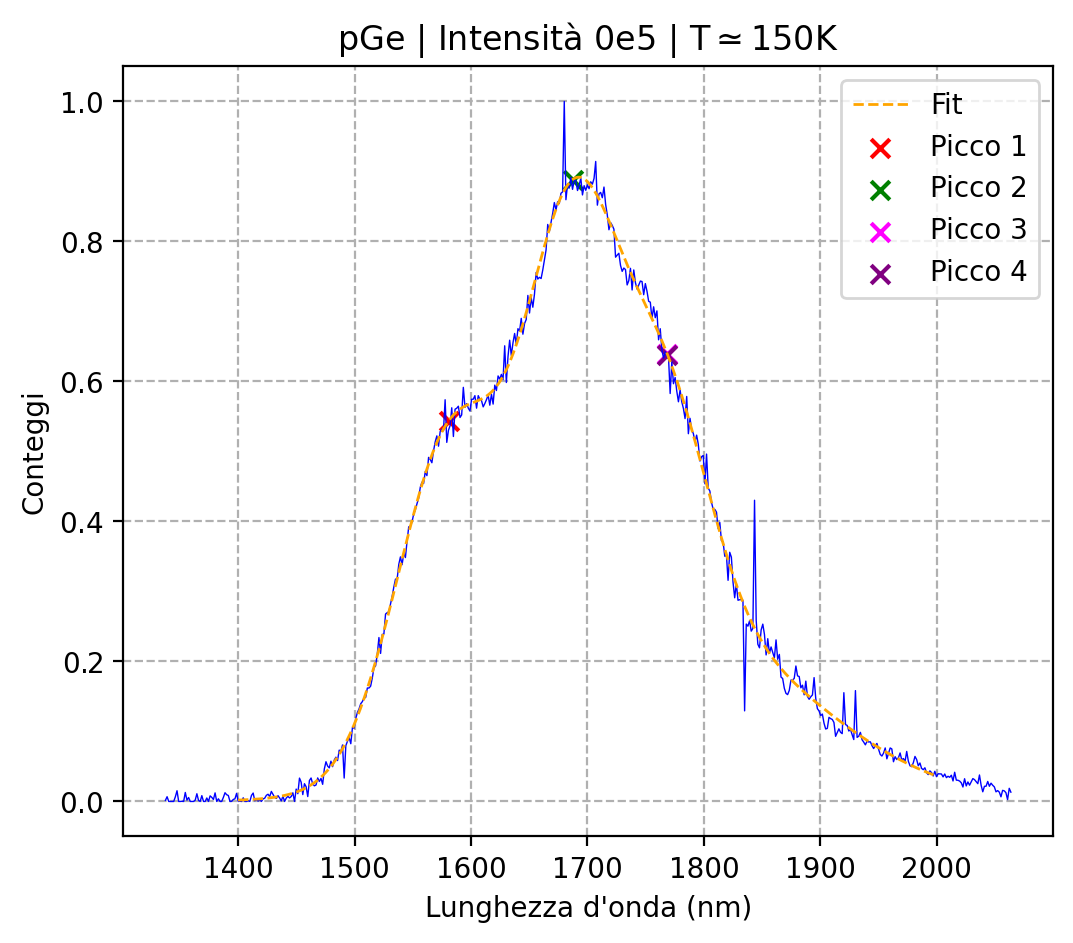

• Gaussiana  1
 - A = 0.4520334739767208
 - mu = 1580.8566603410954
 - sigma = 45.44369905426017
• Gaussiana  2
 - A = 0.6314236088211655
 - mu = 1687.2348478110434
 - sigma = 40.883080005093056
• Gaussiana  3
 - A = 0.2966092531326972
 - mu = 1768.50755852334
 - sigma = 37.28847661664148
• Gaussiana  4
 - A = 0.25514229581482883
 - mu = 1768.7313737815177
 - sigma = 117.02777550271078


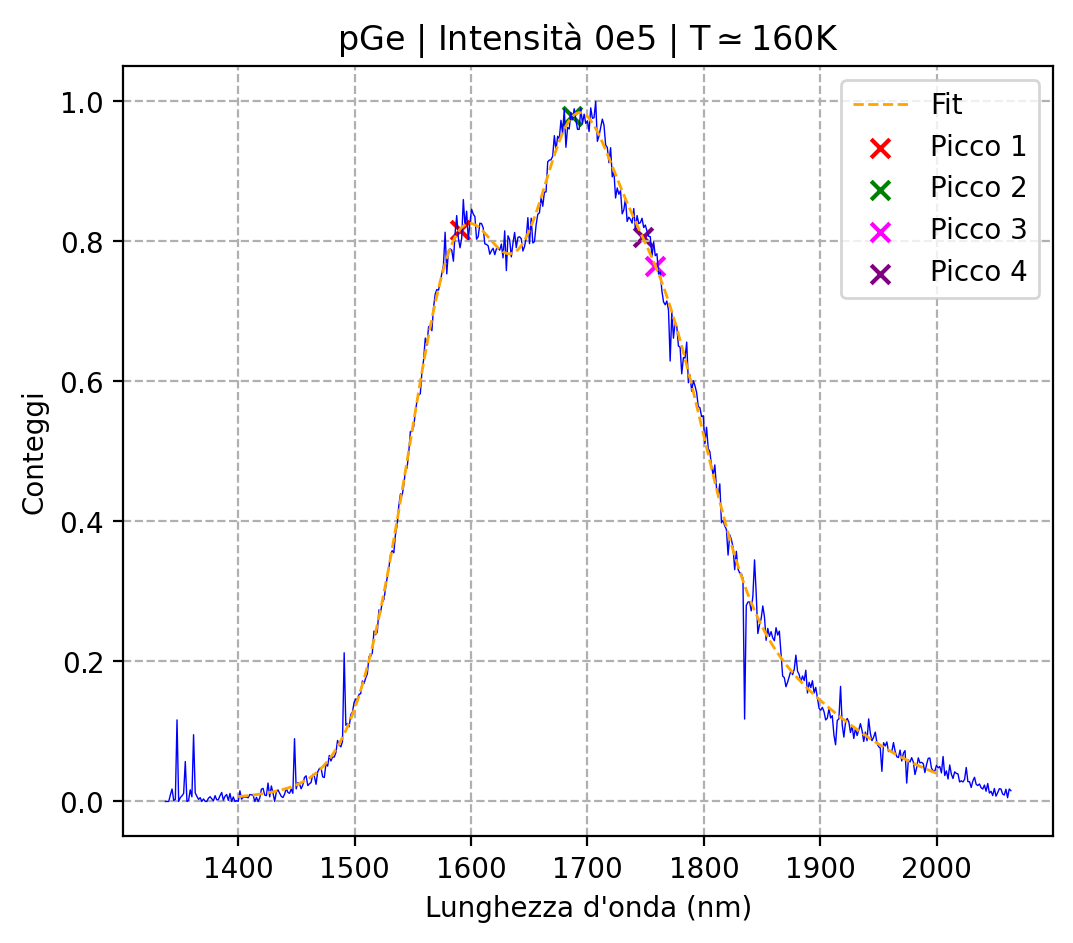

• Gaussiana  1
 - A = 0.6700337910267857
 - mu = 1590.2472784889471
 - sigma = 44.8745969684424
• Gaussiana  2
 - A = 0.5539396091272778
 - mu = 1687.1087386160193
 - sigma = 33.90704366061171
• Gaussiana  3
 - A = 0.4071617380895636
 - mu = 1758.3883432099692
 - sigma = 41.60453730524202
• Gaussiana  4
 - A = 0.29755713108329046
 - mu = 1747.3415990732492
 - sigma = 126.22710536402433


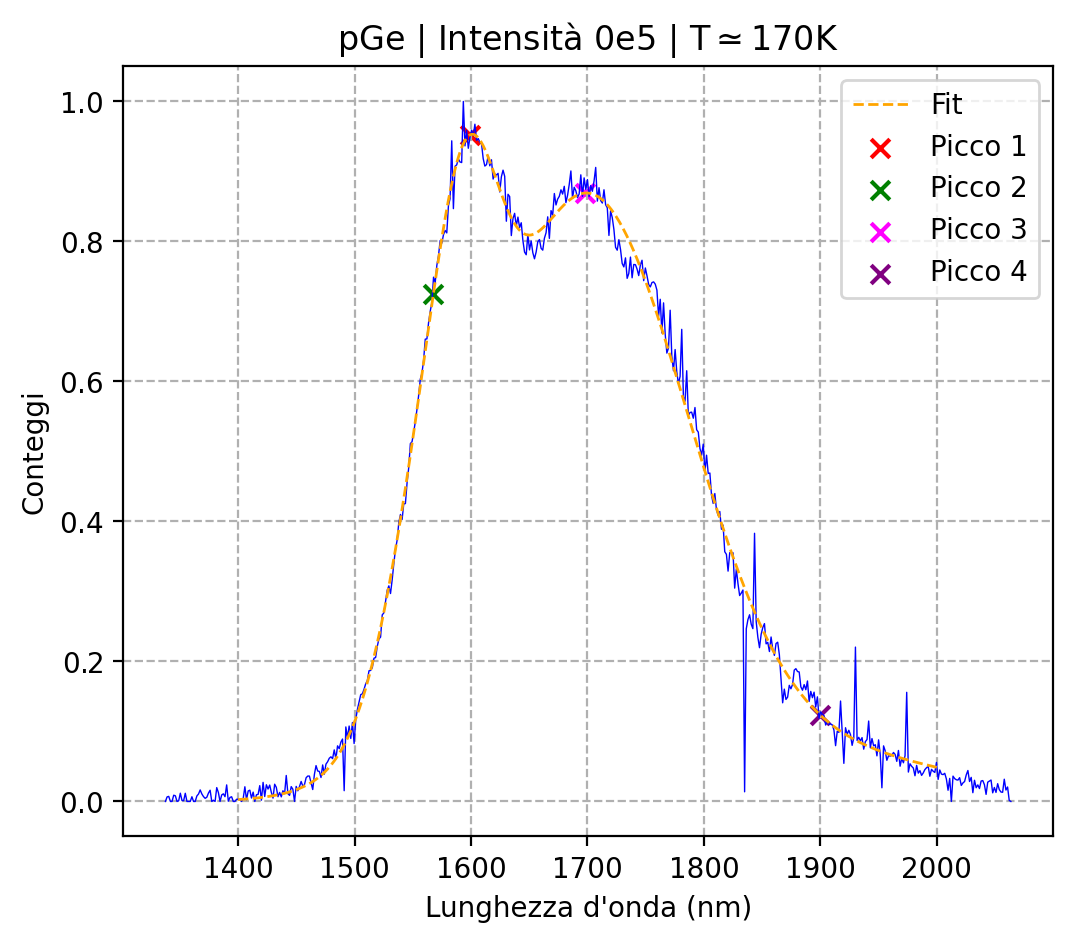

• Gaussiana  1
 - A = 0.29955134623725194
 - mu = 1599.1374445908718
 - sigma = 26.411324285918496
• Gaussiana  2
 - A = 0.2925308416327007
 - mu = 1567.7201389858012
 - sigma = 35.29800345398281
• Gaussiana  3
 - A = 0.8514783400588345
 - mu = 1697.6285007315403
 - sigma = 87.56716040452653
• Gaussiana  4
 - A = 0.06442138195183512
 - mu = 1899.9999999999998
 - sigma = 124.01220454829263


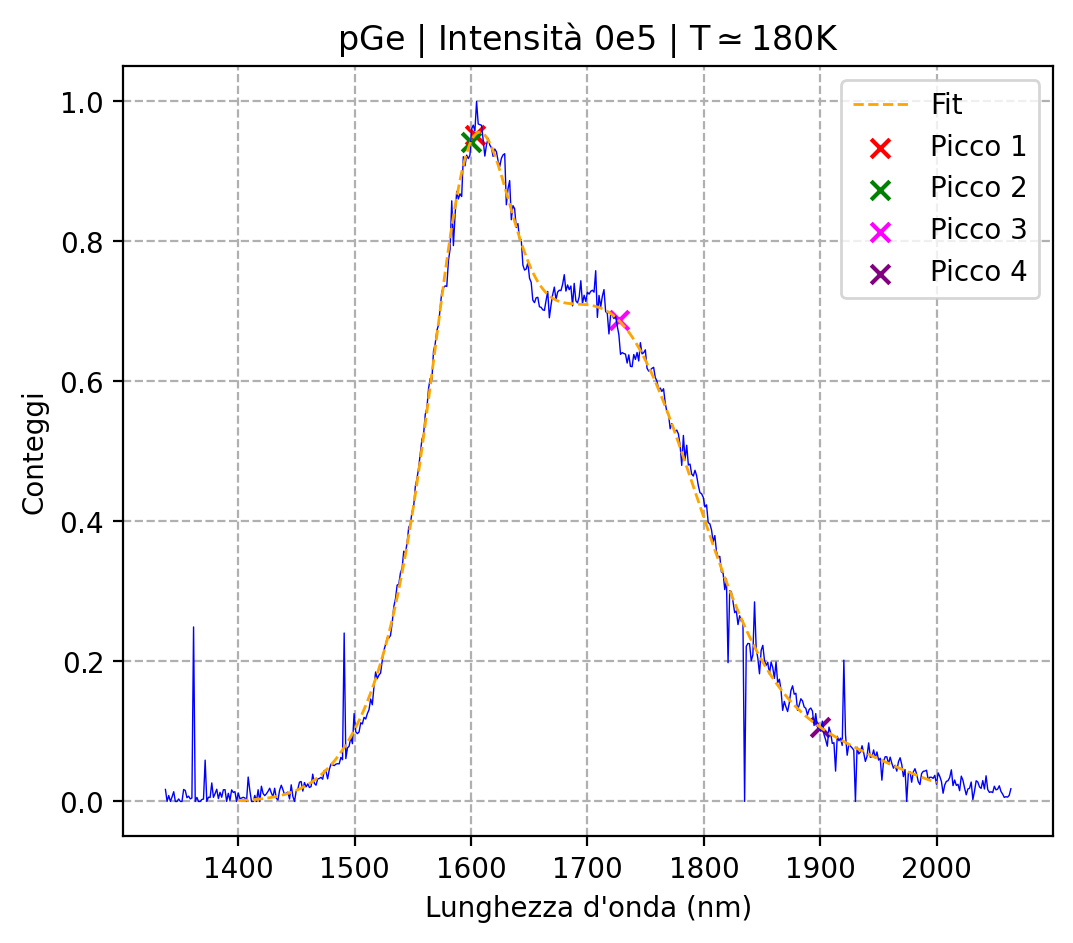

• Gaussiana  1
 - A = 0.4455734004073301
 - mu = 1603.0283900856575
 - sigma = 59.03580762253156
• Gaussiana  2
 - A = 0.365301072831108
 - mu = 1599.817584509373
 - sigma = 29.425546072870745
• Gaussiana  3
 - A = 0.6343085361645957
 - mu = 1726.8217201372015
 - sigma = 71.68141043672459
• Gaussiana  4
 - A = 0.07163489896053567
 - mu = 1899.999999999996
 - sigma = 70.88679745956406


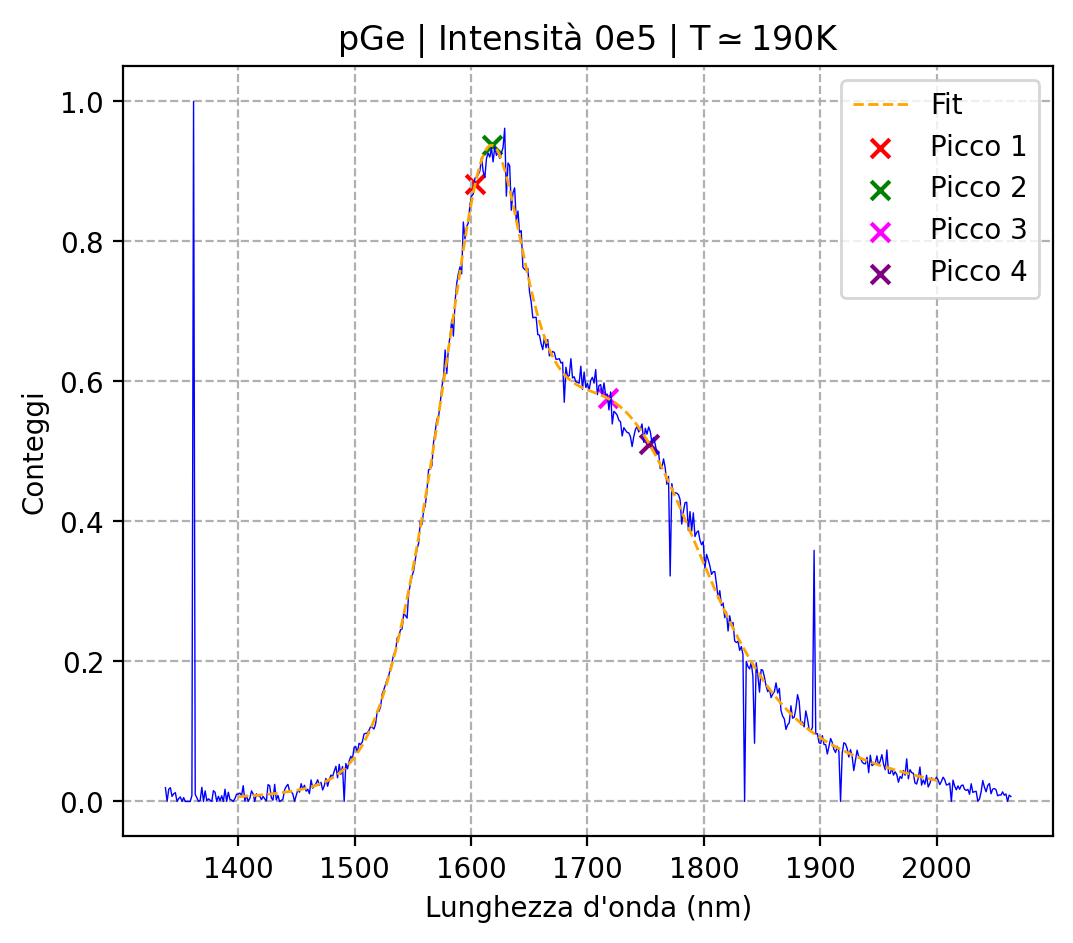

• Gaussiana  1
 - A = 0.5509656111583761
 - mu = 1603.6648782614623
 - sigma = 43.375635228459444
• Gaussiana  2
 - A = 0.17123369528896135
 - mu = 1617.9384650633572
 - sigma = 21.51708302711824
• Gaussiana  3
 - A = 0.4365784702285802
 - mu = 1717.267896987177
 - sigma = 70.67702752342358
• Gaussiana  4
 - A = 0.1253830502763158
 - mu = 1753.1554769194865
 - sigma = 145.7910498655678


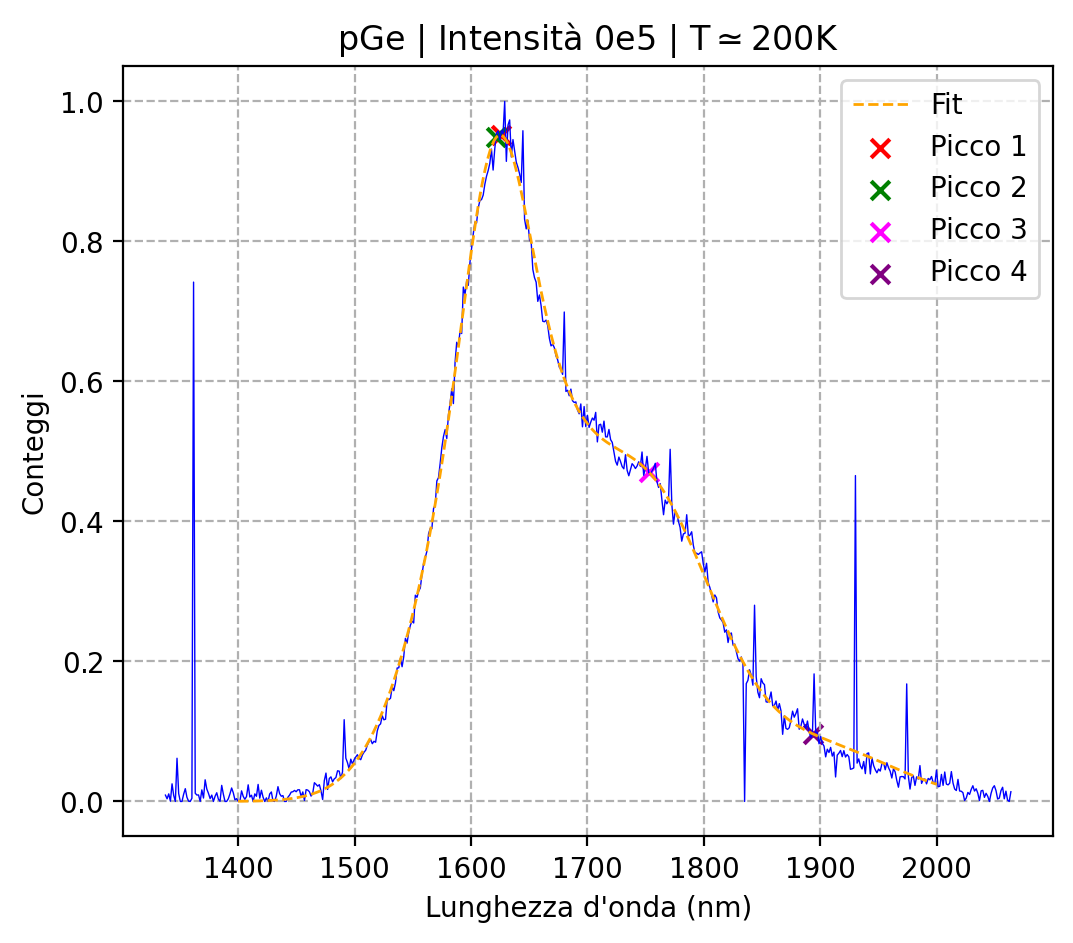

• Gaussiana  1
 - A = 0.6456207915218091
 - mu = 1626.0633076756783
 - sigma = 56.71571220299736
• Gaussiana  2
 - A = 0.2791461836679228
 - mu = 1621.7866014540514
 - sigma = 25.19834288507927
• Gaussiana  3
 - A = 0.4073669182380813
 - mu = 1753.0194445592688
 - sigma = 55.89509928335585
• Gaussiana  4
 - A = 0.07926782941461033
 - mu = 1893.7548809891512
 - sigma = 69.25656495506358


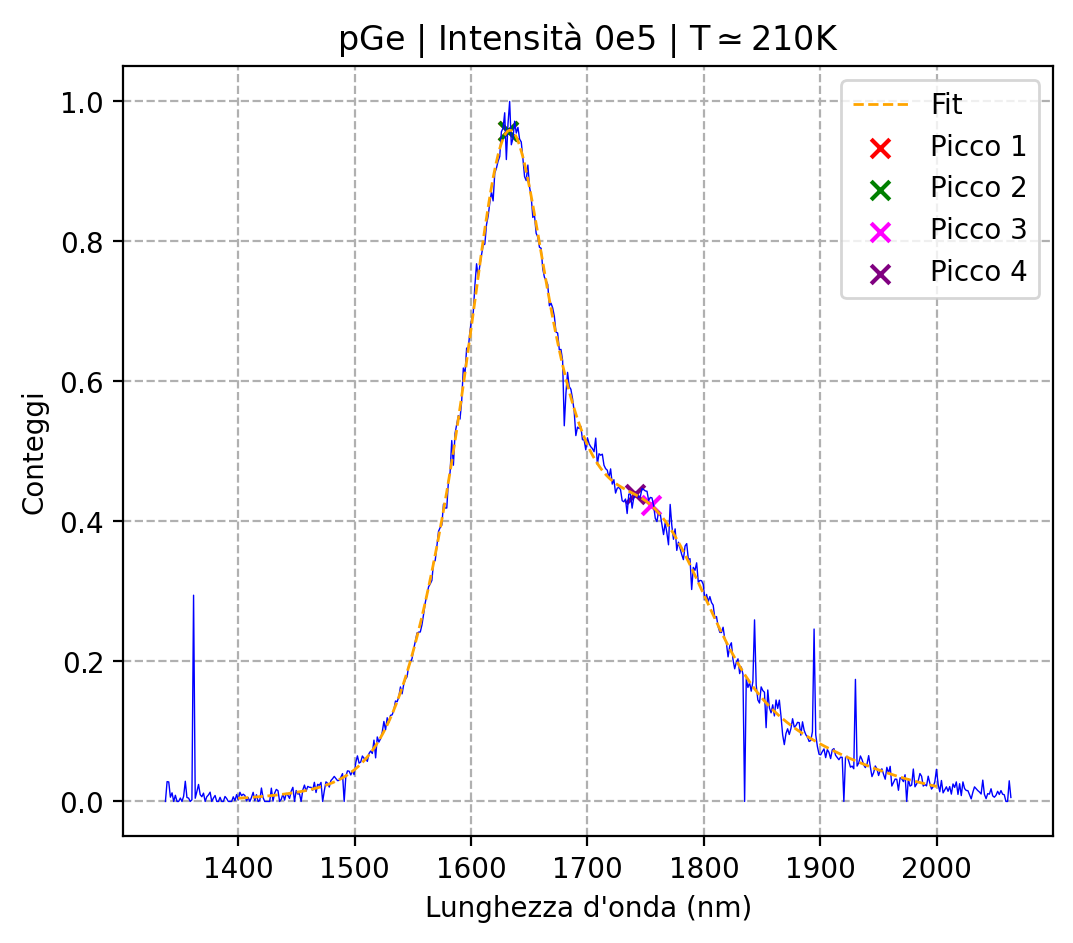

• Gaussiana  1
 - A = 0.625263508347282
 - mu = 1631.410593930574
 - sigma = 48.75216116242709
• Gaussiana  2
 - A = 0.20282522408021816
 - mu = 1632.0067490297176
 - sigma = 21.73451175312483
• Gaussiana  3
 - A = 0.2173467597724951
 - mu = 1754.9008645553565
 - sigma = 45.05293510611066
• Gaussiana  4
 - A = 0.18133305723020368
 - mu = 1740.572793199534
 - sigma = 125.4870877859814


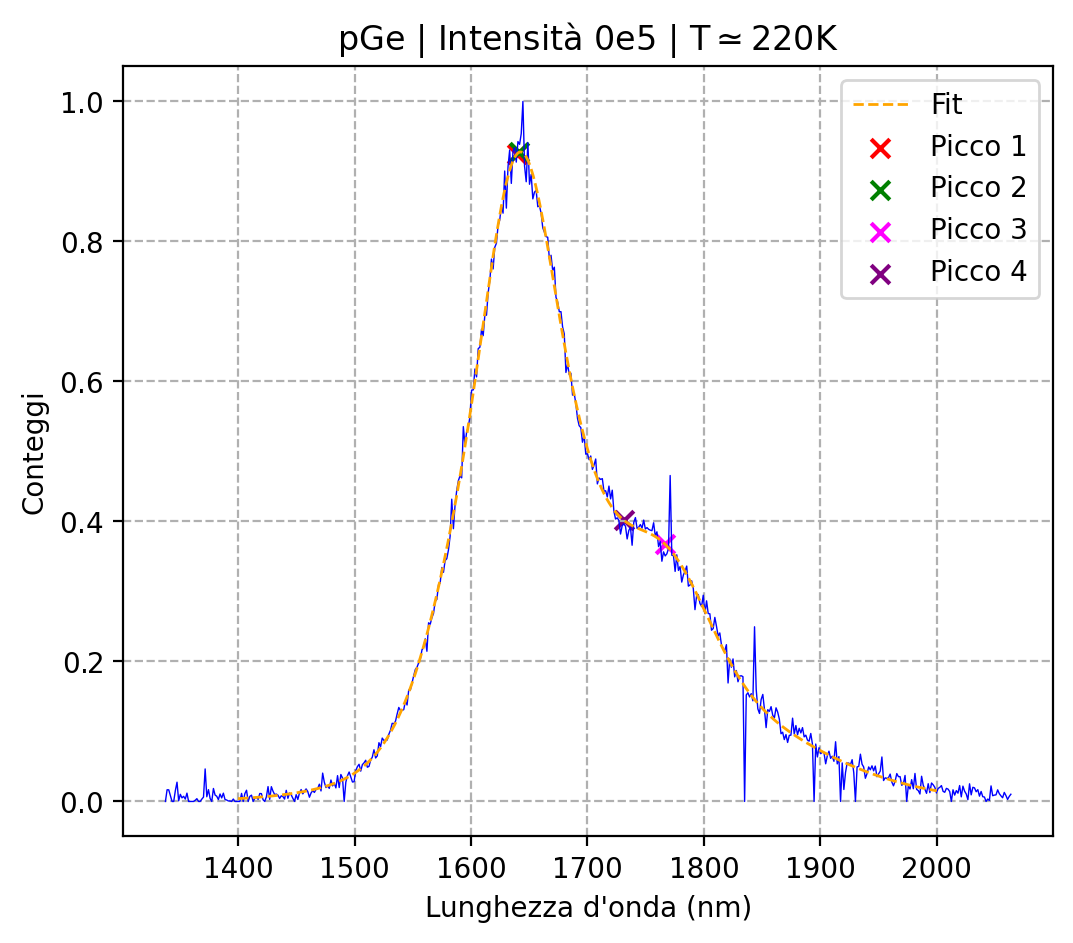

• Gaussiana  1
 - A = 0.5621344919378773
 - mu = 1639.7246966746318
 - sigma = 49.632557238260155
• Gaussiana  2
 - A = 0.21500898481784703
 - mu = 1641.5912647866148
 - sigma = 23.68047515477384
• Gaussiana  3
 - A = 0.15471983824147717
 - mu = 1766.44136748852
 - sigma = 37.13482076077123
• Gaussiana  4
 - A = 0.20013311598447997
 - mu = 1731.2087145762246
 - sigma = 118.38918686717568


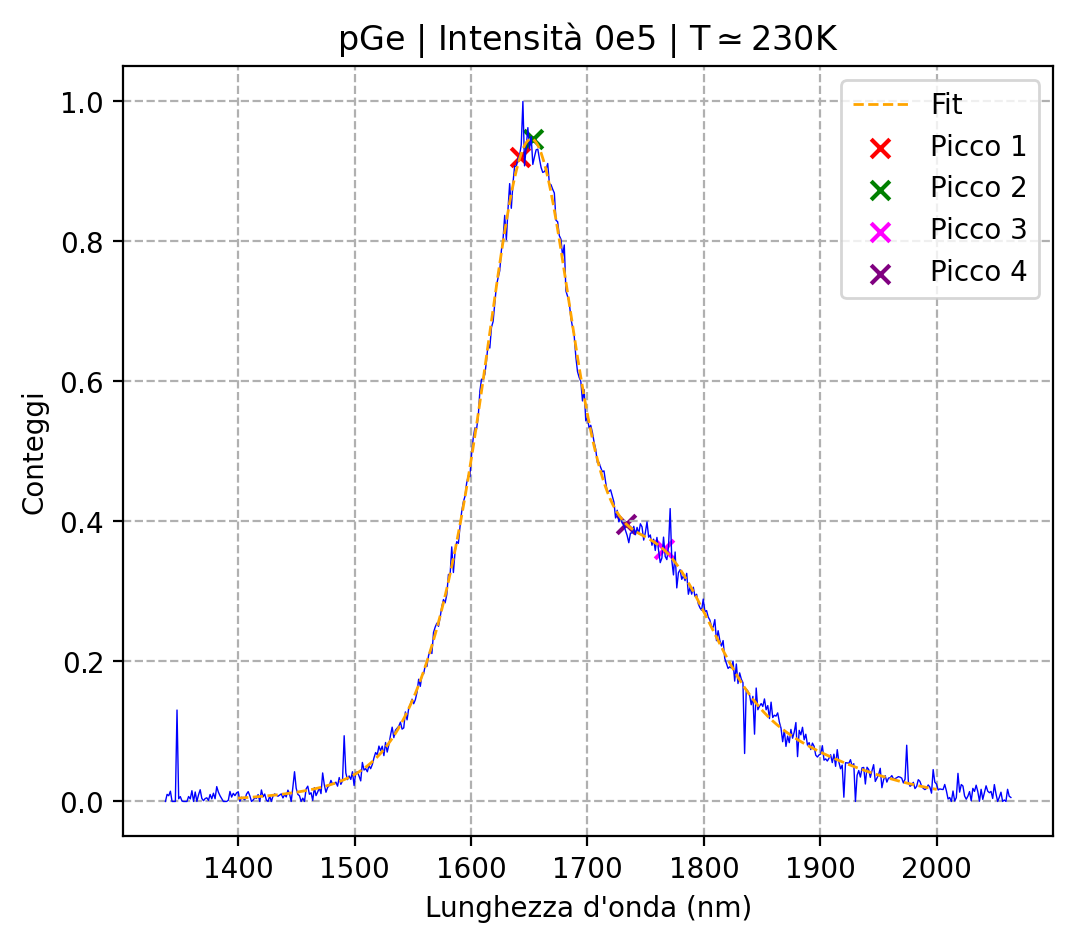

• Gaussiana  1
 - A = 0.44944381343392176
 - mu = 1642.2593691243478
 - sigma = 50.88033099021153
• Gaussiana  2
 - A = 0.36341241941259694
 - mu = 1653.3161273499416
 - sigma = 29.58027321520968
• Gaussiana  3
 - A = 0.169829094462625
 - mu = 1765.3456697328022
 - sigma = 40.777564271611084
• Gaussiana  4
 - A = 0.1715174218330229
 - mu = 1733.34262188089
 - sigma = 124.34351847645655


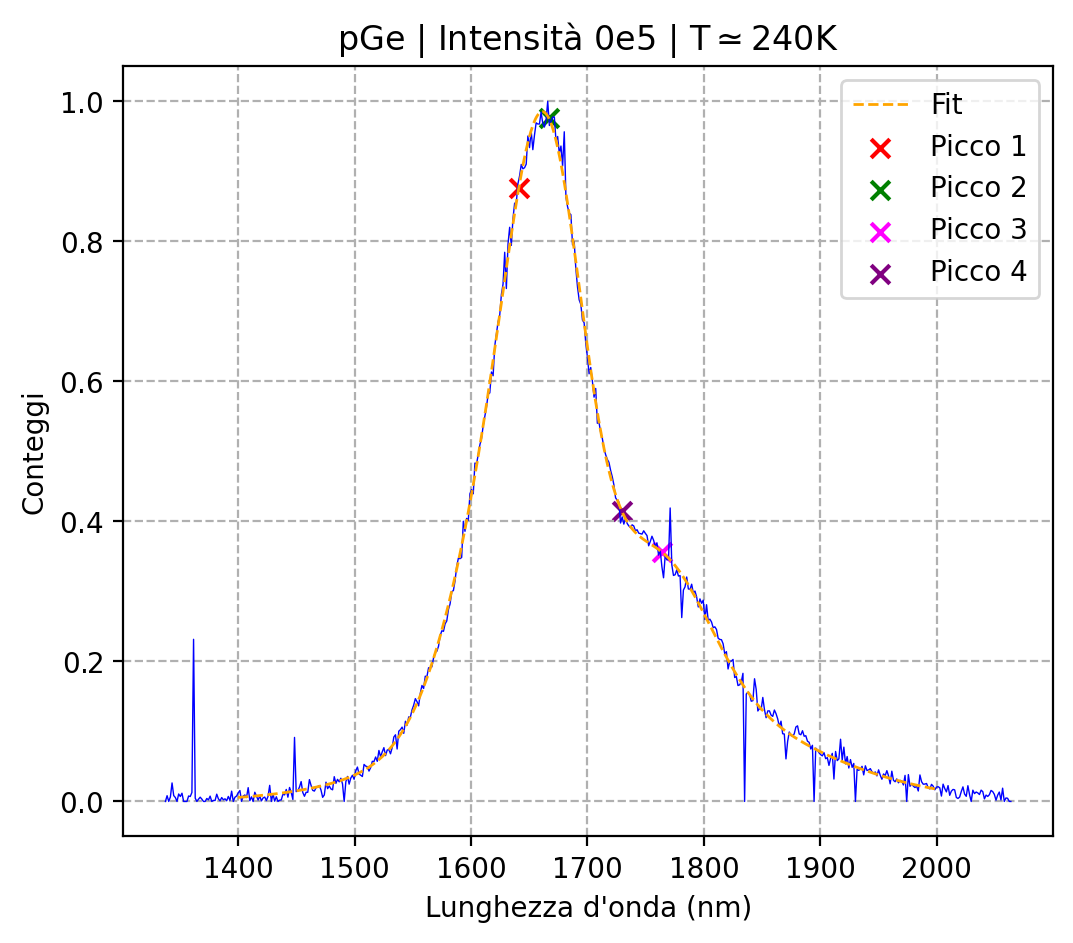

• Gaussiana  1
 - A = 0.4401101518372335
 - mu = 1641.1076537879583
 - sigma = 46.23027312462529
• Gaussiana  2
 - A = 0.43209059448065823
 - mu = 1666.7446581599231
 - sigma = 29.57612751015173
• Gaussiana  3
 - A = 0.17164768440970374
 - mu = 1763.6176248193085
 - sigma = 41.36240435243405
• Gaussiana  4
 - A = 0.17638020580050065
 - mu = 1729.366715160833
 - sigma = 125.85684189685036
Fit non riuscito


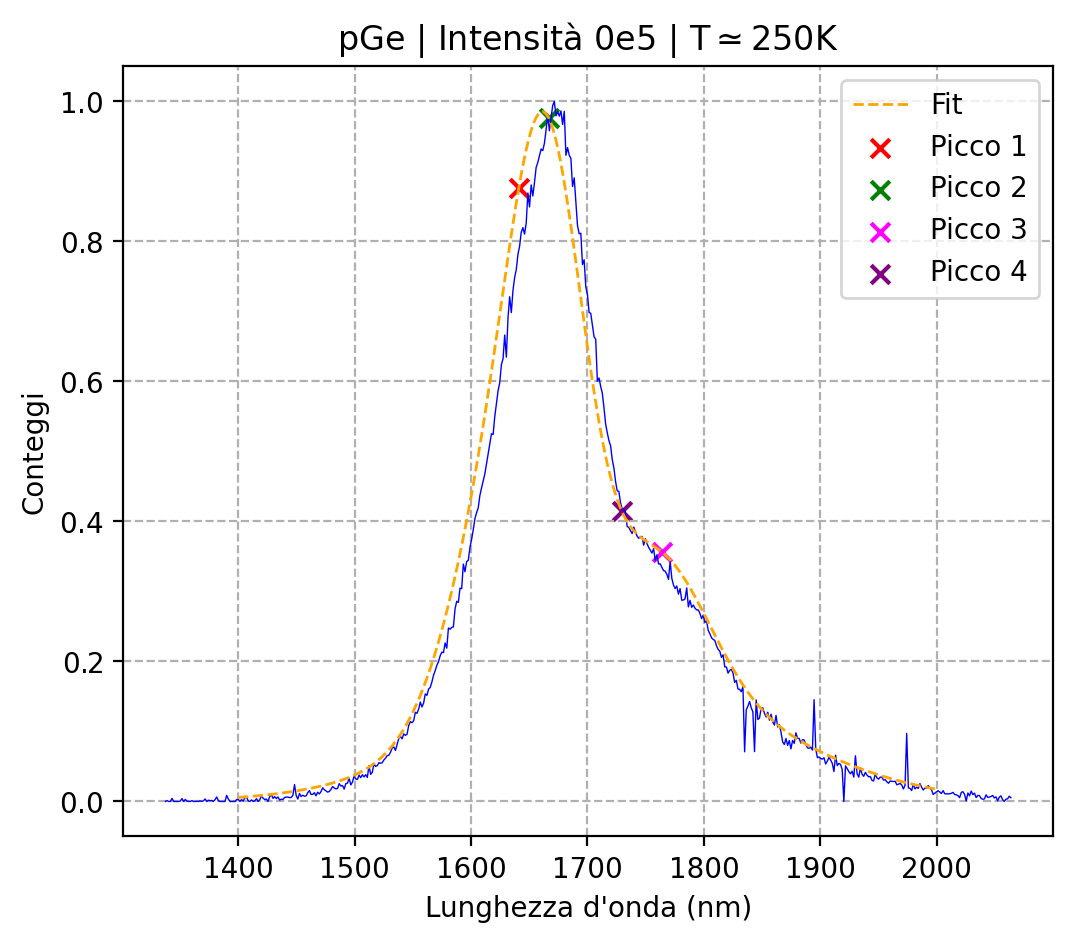

• Gaussiana  1
 - A = 0.4401101518372335
 - mu = 1641.1076537879583
 - sigma = 46.23027312462529
• Gaussiana  2
 - A = 0.43209059448065823
 - mu = 1666.7446581599231
 - sigma = 29.57612751015173
• Gaussiana  3
 - A = 0.17164768440970374
 - mu = 1763.6176248193085
 - sigma = 41.36240435243405
• Gaussiana  4
 - A = 0.17638020580050065
 - mu = 1729.366715160833
 - sigma = 125.85684189685036
Fit non riuscito


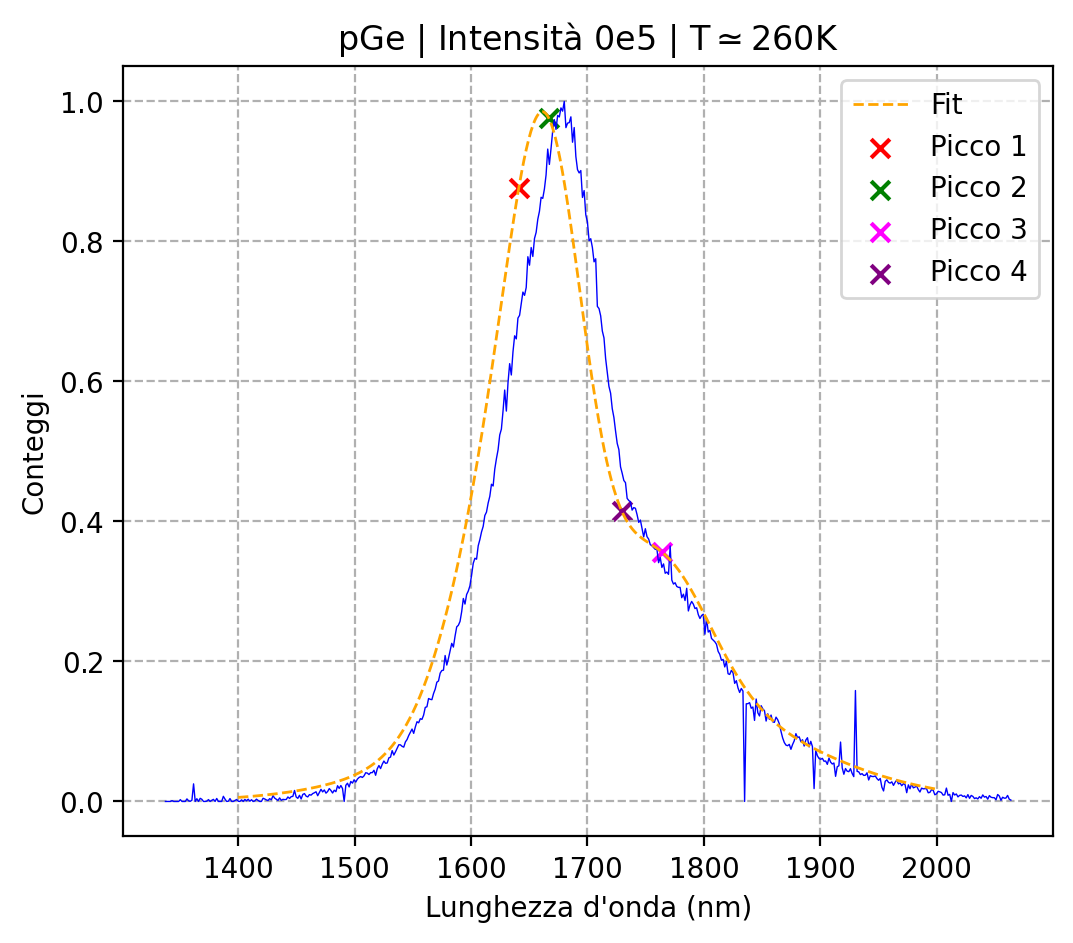

• Gaussiana  1
 - A = 0.4401101518372335
 - mu = 1641.1076537879583
 - sigma = 46.23027312462529
• Gaussiana  2
 - A = 0.43209059448065823
 - mu = 1666.7446581599231
 - sigma = 29.57612751015173
• Gaussiana  3
 - A = 0.17164768440970374
 - mu = 1763.6176248193085
 - sigma = 41.36240435243405
• Gaussiana  4
 - A = 0.17638020580050065
 - mu = 1729.366715160833
 - sigma = 125.85684189685036


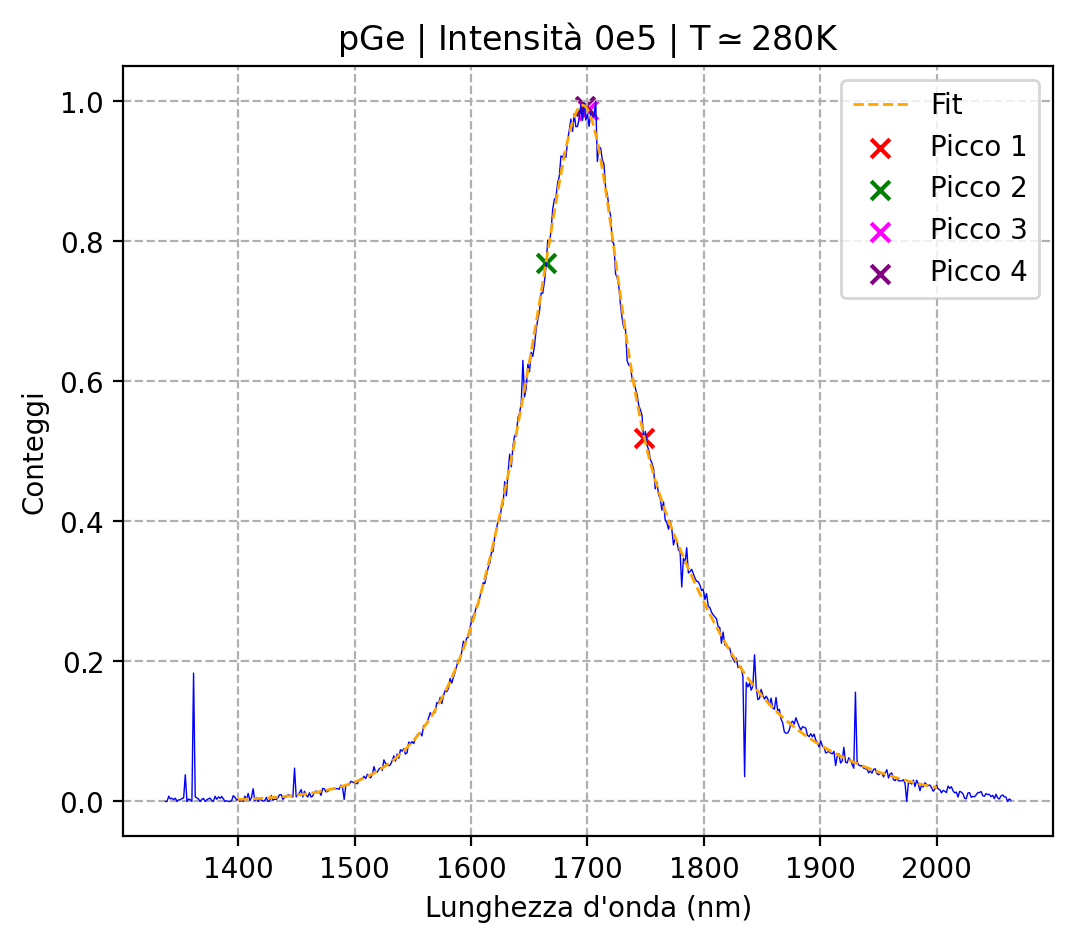

• Gaussiana  1
 - A = 0.1586930696782133
 - mu = 1748.921397956193
 - sigma = 122.83715323827231
• Gaussiana  2
 - A = 0.1668266554978704
 - mu = 1664.4330173607382
 - sigma = 31.711870078048428
• Gaussiana  3
 - A = 0.3449263890217948
 - mu = 1700.173988804755
 - sigma = 23.94293196952315
• Gaussiana  4
 - A = 0.4086851220064525
 - mu = 1697.7828257943838
 - sigma = 69.60856639686848


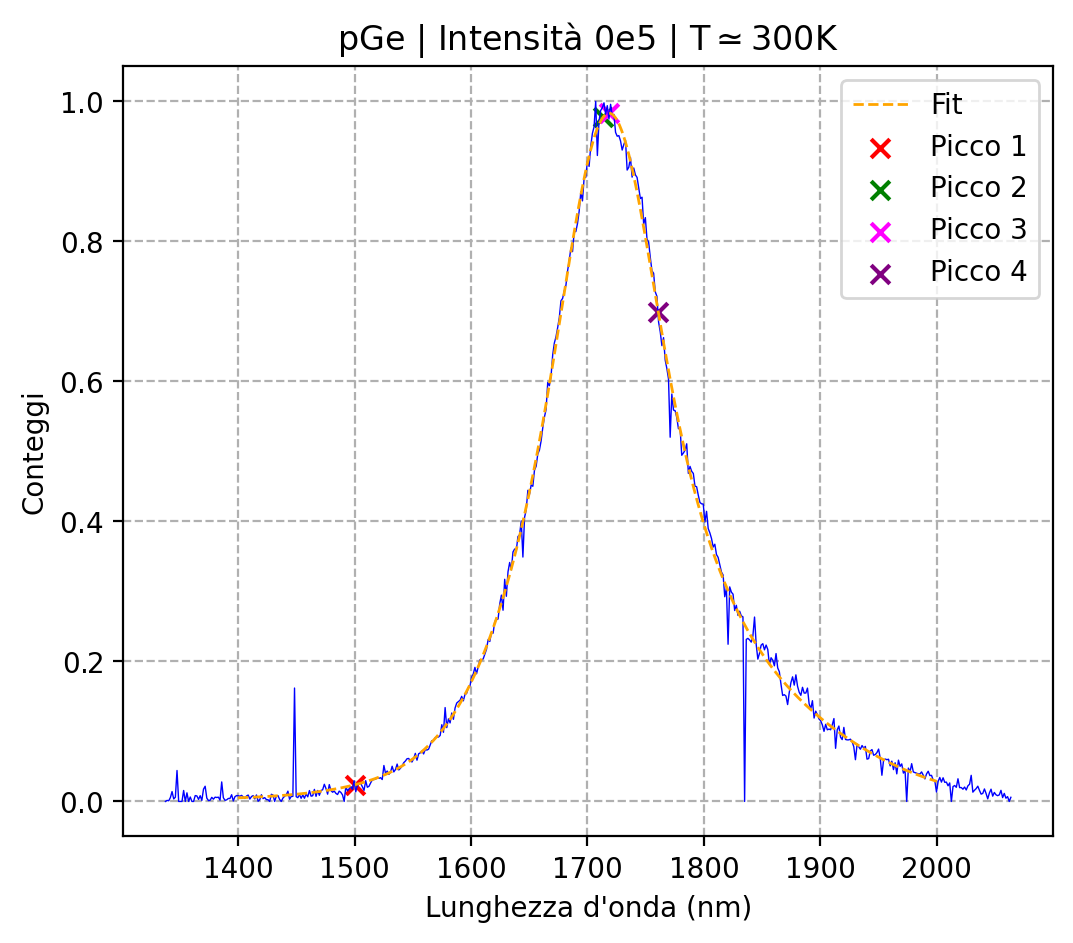

• Gaussiana  1
 - A = 0.003691777947012799
 - mu = 1500.0000000083883
 - sigma = 199.99999999954892
• Gaussiana  2
 - A = 0.4347605336503607
 - mu = 1713.6867237090476
 - sigma = 60.79570300237697
• Gaussiana  3
 - A = 0.32842799634568326
 - mu = 1718.2585892641544
 - sigma = 32.768783497295765
• Gaussiana  4
 - A = 0.23438541045055503
 - mu = 1760.8797112678733
 - sigma = 116.54827265460298


In [ ]:
for T in arr_T:
    
    waveln = GaSb_T[T][0]
    counts = GaSb_T[T][1]
    
    # normalizzo i counts
    maximum = np.max(counts)
    counts = counts / maximum

    # Plot
    plt.figure(figsize=(6,5), dpi=200)
    plt.plot(waveln, counts, linestyle='-', color='b', linewidth=0.5)#, zorder=1)
    
    ## FIT ##
    
    # isolo regione 1400 < x < 2000
    mask = (waveln > 1400) & (waveln < 2000)
    x_fit = waveln[mask]
    y_fit = counts[mask]
    
    # imposto parametri: ogni entrata è una tripla (a, mu, sigma)
    params = [
        (1, 1571, 50),
        (1, 1691, 50),
        (1, 1746, 50),
        (1, 1748, 50)
    ]
    # 'Appiattisco' la lista dei parametri iniziali
    par_flattened = np.array(params).flatten()
    
    # Set dei bounds
    low = [0, 1500, 10] * len(params)  # Es: A >= 0, mu >= 1500, sigma >= 10
    upp = [np.inf, 1900, 200] * len(params)  # Limiti superiori
    
    # esecuzione fit
    try:
        # Fit gaussiano - che bounds impostare?
        popt, pcov = curve_fit(N_gaussiane, x_fit, y_fit, p0=par_flattened, bounds=(low,upp))
    except:
        print(f"Fit non riuscito")
        
    ## PLOT CURVA FIT ##
    x_fit = np.linspace(1400, 2000, 600)
    y_fit = N_gaussiane(x_fit, *popt)
    plt.plot(x_fit, y_fit, linestyle='--', color='orange', label=f"Fit", linewidth=1)#, zorder=2)
    
    # plotto anche i picchi individuati dal fit
    for i in range(0, round(len(popt)/3)): 
        x_picco = popt[3*i+1]
        y_picco = N_gaussiane(x_picco, *popt)
        plt.scatter(x_picco, y_picco, 
                    color=col[i], marker='x',
                    label='Picco '+str(i+1),
                    s=45, #alpha=0-1 per opacità
                    #zorder=3
                    )
    
    ## OPZIONI GRAFICHE ##
    plt.title(r'pGe | Intensità 0e5% | T$\simeq$' + T + r'K')
    plt.xlabel("Lunghezza d'onda (nm)")
    plt.ylabel("Conteggi")
    plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
    plt.legend()
    plt.grid(linestyle='--')
    #plt.tight_layout()
    plt.show()
    
    ## PRINT RISULTATI FIT ##
    for i in range(0, round(len(popt)/3)):
        print('• Gaussiana ', i+1)
        print(' - A =', popt[3*i])
        print(' - mu =', popt[3*i+1])
        print(' - sigma =', popt[3*i+2])

### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - -